# Recommendation System Analysis
### Submitted By:
    1. Trishna Tamanna Biswal
    2. Harini

# Data Loading

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

# Load the dataset
path = 'e-shop_clothing_2008.csv'
df = pd.read_csv(path)

df.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


# Data Cleaning and understanding 

In [2]:
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'session ID',
       'page 1 (main category)', 'page 2 (clothing model)', 'colour',
       'location', 'model photography', 'price', 'price 2', 'page'],
      dtype='object')

In [3]:
df.shape

(165474, 14)

In [4]:
df.describe()

,year,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
count,165474.0,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000,165474.000000
mean,2008.0,5.585887,14.524554,9.817476,26.952621,12058.417056,2.400842,6.227655,3.258198,1.260071,43.802507,1.488167,1.710166
std,0.0,1.328160,8.830374,13.478411,7.150691,7008.418903,1.144420,4.235606,1.713206,0.438674,12.548131,0.499861,0.982412
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5931.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11967.500000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18219.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [5]:
#Data Type of all the columns 

print("\nData Types of Each Column:")  
print(df.dtypes)  


Data Types of Each Column:
year                        int64
month                       int64
day                         int64
order                       int64
country                     int64
session ID                  int64
page 1 (main category)      int64
page 2 (clothing model)    object
colour                      int64
location                    int64
model photography           int64
price                       int64
price 2                     int64
page                        int64
dtype: object


In [6]:
#Number of Duplicate Rows

duplicates = df.duplicated().sum()  
print("\nNumber of Duplicate Rows:")  
print(duplicates)


Number of Duplicate Rows:
0


In [7]:
#Count of Null Values in each column

print("\nNull Values Count in Each Column:")
print(df.isnull().sum())


Null Values Count in Each Column:
year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


In [8]:
#Count of Junk Values in each column

junk_values = df.apply(lambda x: x.str.contains(r'[^A-Za-z0-9\s]', na=False).sum() if x.dtype == "object" else 0)  
print("\nJunk Values Count in Each Column:")  
print(junk_values)  


Junk Values Count in Each Column:
year                       0
month                      0
day                        0
order                      0
country                    0
session ID                 0
page 1 (main category)     0
page 2 (clothing model)    0
colour                     0
location                   0
model photography          0
price                      0
price 2                    0
page                       0
dtype: int64


In [9]:
#list of all the Columns 
target_columns = ['country', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']  

print("Frequency of Each Category in Specified Columns (Sorted by Count):\n")  

for col in target_columns:  
    print(f"--- {col} Value Counts ---")
        
    if df[col].dtype == 'object':  
        counts = df[col].value_counts().sort_values(ascending=False)
        for value, count in counts.items():  
            print(f"{value}: {count}")  
        
    elif df[col].dtype == 'int64':
        counts = df[col].value_counts().sort_values(ascending=False)
        for value, count in counts.items():  
            print(f"{value}: {count}")  
        
    print("\n")  
    

Frequency of Each Category in Specified Columns (Sorted by Count):

--- country Value Counts ---
29: 133963
9: 18003
24: 4091
46: 2522
44: 1385
16: 834
21: 811
34: 716
41: 684
3: 256
27: 227
12: 210
42: 170
37: 163
10: 152
31: 144
22: 144
28: 139
38: 137
15: 125
11: 115
25: 71
2: 58
32: 49
23: 46
14: 43
39: 34
43: 31
19: 29
17: 23
36: 19
18: 18
20: 10
7: 9
47: 7
45: 6
6: 5
30: 5
5: 4
33: 3
1: 3
35: 3
13: 2
26: 2
40: 1
4: 1
8: 1


--- page 1 (main category) Value Counts ---
1: 49742
4: 38747
3: 38577
2: 38408


--- page 2 (clothing model) Value Counts ---
B4: 3579
A2: 3013
A11: 2789
P1: 2681
B10: 2566
A4: 2522
A15: 2489
A5: 2354
A10: 2280
A1: 2265
A12: 2010
A3: 1932
A9: 1923
B13: 1919
B24: 1879
C5: 1834
A6: 1802
A7: 1622
A8: 1585
A13: 1577
B1: 1552
B11: 1543
P6: 1536
A17: 1531
P16: 1508
C17: 1507
B15: 1499
P15: 1465
B17: 1457
A31: 1425
B16: 1408
B31: 1406
B23: 1391
A21: 1388
A16: 1388
B12: 1369
B32: 1361
B3: 1288
B26: 1271
B2: 1214
C56: 1186
C14: 1178
P3: 1149
B14: 1118
C7: 1112
C2: 111

In [10]:
# Check unique values and their counts for categorical columns  

target_columns = ['country', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']  

print("\nUnique Values for Categorical Columns:")
for col in target_columns:  
    unique_values = df[col].unique()  
    print(f"{col}: {df[col].nunique()} unique values")  
    print(f"Unique Values: {unique_values}\n")


Unique Values for Categorical Columns:
country: 47 unique values
Unique Values: [29 21  9 16 38 24 41 12 31 44 34 28 46 15 10 27  7 25 20 17 22 19 42  8
  3 37 30 14 43 23 47 36  2 33 32 45 18 11 40  6 39  1 35 13  4 26  5]

page 1 (main category): 4 unique values
Unique Values: [1 2 3 4]

page 2 (clothing model): 217 unique values
Unique Values: ['A13' 'A16' 'B4' 'B17' 'B8' 'C56' 'C57' 'P67' 'P82' 'B31' 'B21' 'B24'
 'B27' 'A10' 'P1' 'P34' 'P33' 'C4' 'C7' 'C10' 'C17' 'P77' 'A34' 'A37'
 'C25' 'C21' 'C15' 'C53' 'B26' 'A11' 'C5' 'P60' 'P56' 'P55' 'P48' 'P50'
 'P42' 'P23' 'C49' 'B23' 'C19' 'C34' 'C40' 'C50' 'C42' 'A18' 'A1' 'B1'
 'B16' 'A3' 'B3' 'B30' 'P16' 'A2' 'A5' 'A41' 'B2' 'B13' 'B15' 'B9' 'B20'
 'B25' 'B33' 'B34' 'C2' 'C33' 'C35' 'C55' 'C59' 'P61' 'P62' 'A6' 'C47'
 'B32' 'A17' 'A7' 'A8' 'A9' 'A20' 'A32' 'C11' 'C22' 'P12' 'A4' 'A23' 'B12'
 'B10' 'C14' 'A12' 'A31' 'A15' 'B7' 'C8' 'C18' 'P2' 'P10' 'C26' 'C31'
 'A35' 'A36' 'C46' 'P29' 'A21' 'P63' 'P30' 'P32' 'P66' 'P57' 'P43' 'P4'
 'A28

### Removing Outliers

<Figure size 1600x1200 with 0 Axes>

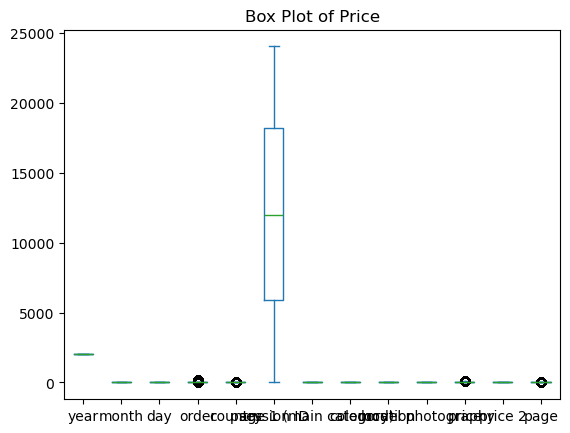

Outliers in the 'price' column:
115       82
237       82
321       82
380       82
426       82
          ..
165133    82
165134    82
165214    82
165290    82
165411    82
Name: price, Length: 1923, dtype: int64 
 f(1923,)
--- Removing (1923,) Outliers ---



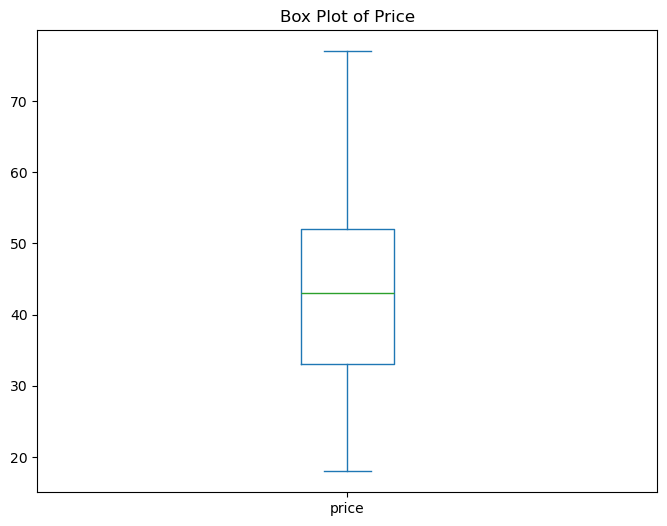

In [11]:

plt.figure(figsize=(16, 12))  
df.plot(kind='box')  
plt.title('Box Plot of Price')  

plt.show()  

# Calculating outliers directly  
Q1 = df['price'].quantile(0.25)  
Q3 = df['price'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]  
print("Outliers in the 'price' column:")  
print(f"{outliers['price']} \n f{outliers['price'].shape}")  

print(f"--- Removing {outliers['price'].shape} Outliers ---\n")


# Outlier removal for 'price'
q1, q3 = df['price'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


plt.figure(figsize=(8, 6))  
df['price'].plot(kind='box')  
plt.title('Box Plot of Price')  
plt.show()  




# Exploratory data analysis (EDA) 

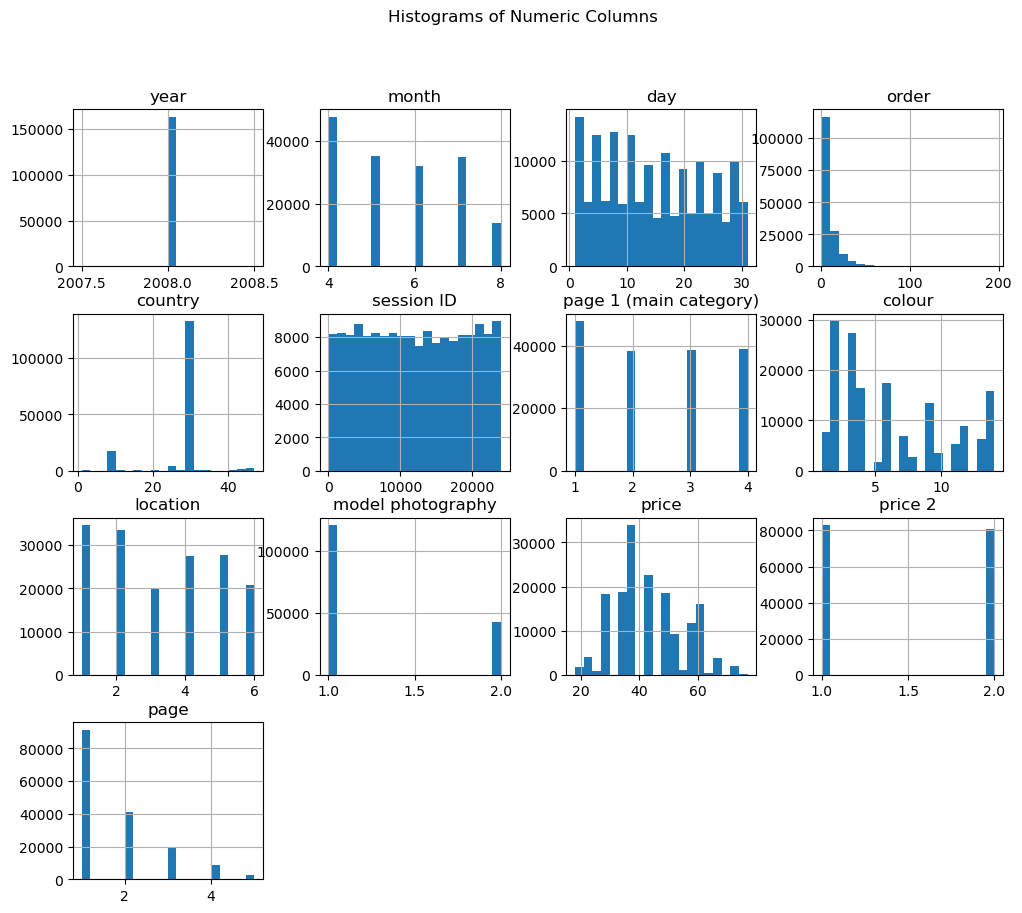

In [12]:
# 1

# check the distribution of numerical columns
df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numeric Columns")
plt.show()

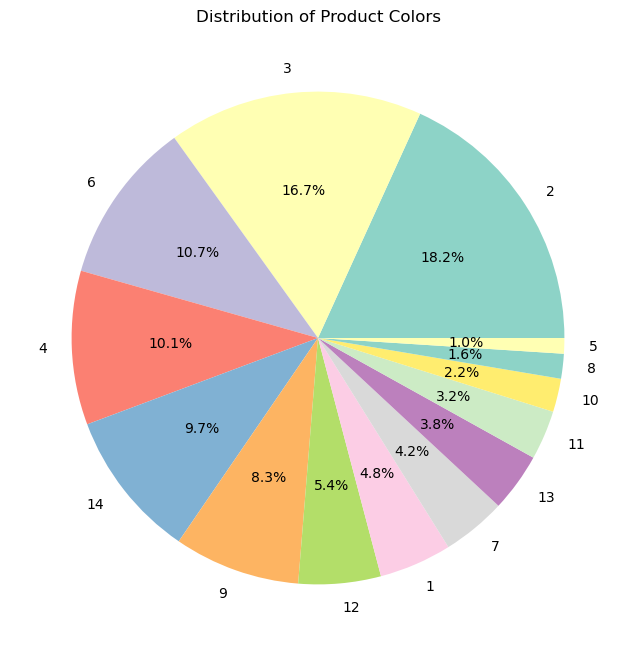

In [13]:
# 3 

# percentage distribution of colours 
color_counts = df['colour'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3"))
plt.title("Distribution of Product Colors")
plt.show()

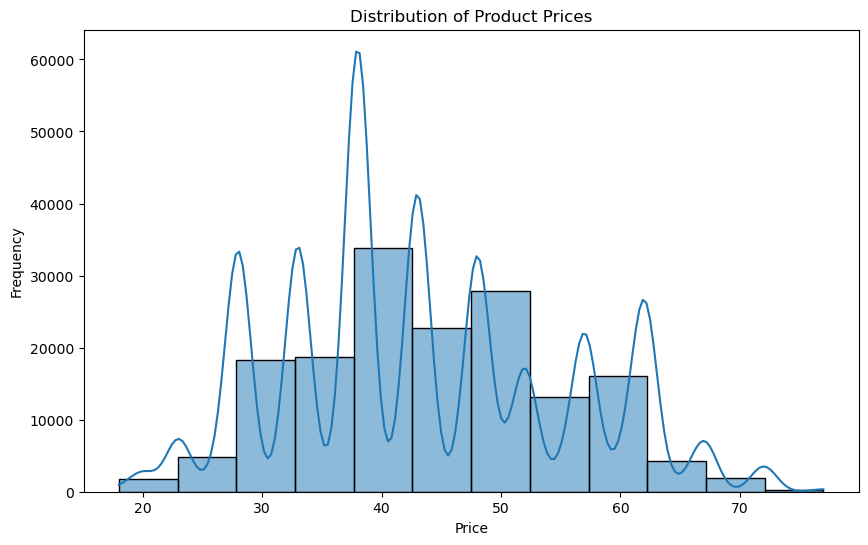

In [14]:
# 4 

# Plot the distribution of product prices
# shows: distirubtion of price in our dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=12, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

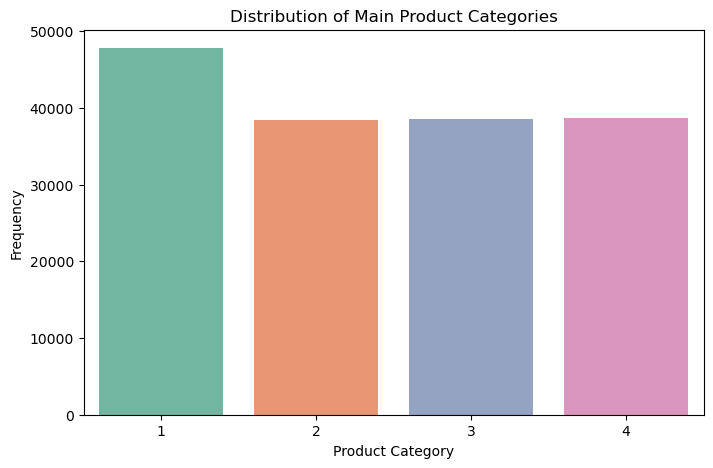

In [15]:
# 5 

# Analyze the main categories (Page 1)
# shows: Count of each of main category
plt.figure(figsize=(8, 5))
sns.countplot(x='page 1 (main category)', data=df, palette='Set2')
plt.title('Distribution of Main Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()


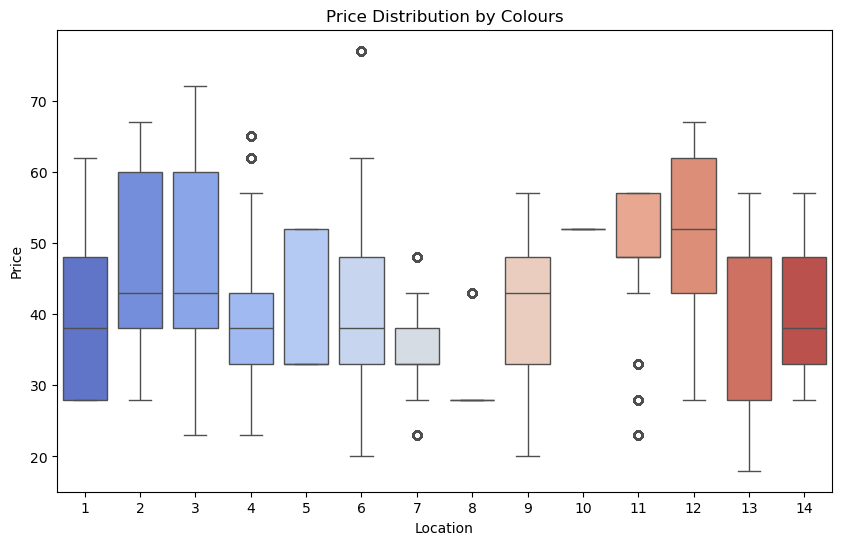

In [16]:
# 6 

# Data Spread between price and colour
# shows: 
plt.figure(figsize=(10, 6))
sns.boxplot(x='colour', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution by Colours')
plt.xlabel('Location')
plt.ylabel('Price')
plt.show()


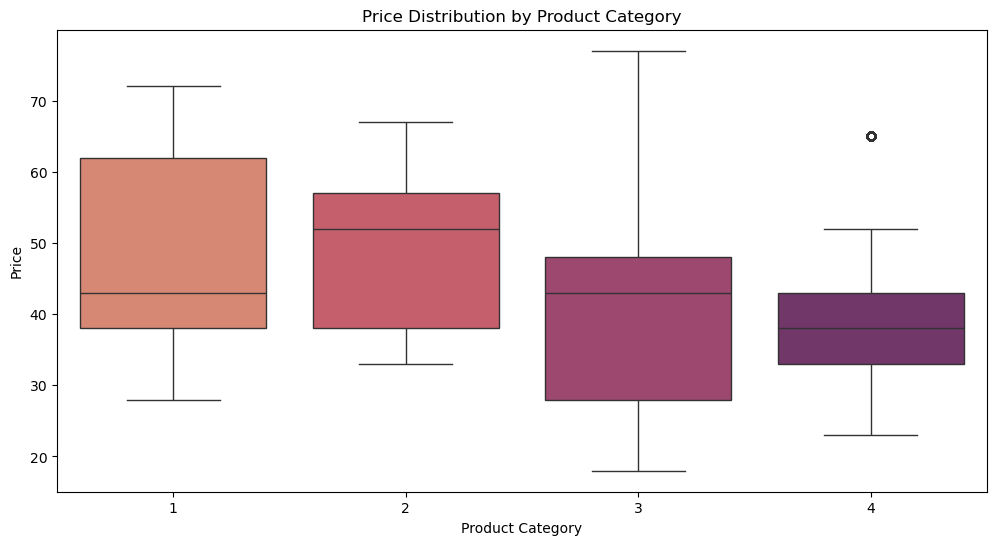

In [17]:
# 7 

# Comparing page 1 (main cateory) with price 

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='page 1 (main category)', y='price', palette="flare")
plt.title("Price Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.show()

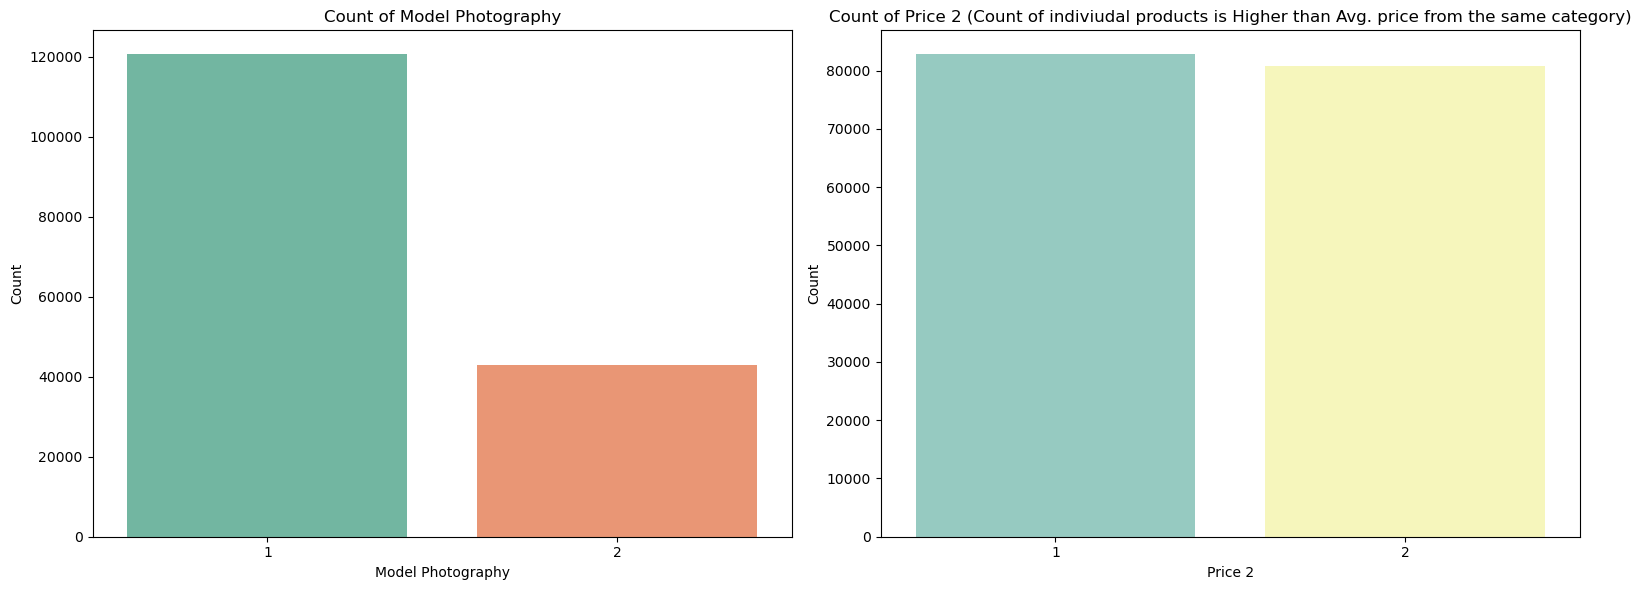

In [18]:
# 8 

# Set up the figure and axes for side-by-side plots
plt.figure(figsize=(16, 6))

# Plot for "Model Photography"
plt.subplot(1, 2, 1)
sns.countplot(x='model photography', data=df, palette='Set2')
plt.title('Count of Model Photography')
plt.xlabel('Model Photography')
plt.ylabel('Count')

# Plot for "Price 2"
plt.subplot(1, 2, 2)
sns.countplot(x='price 2', data=df, palette='Set3')
plt.title('Count of Price 2 (Count of indiviudal products is Higher than Avg. price from the same category)')
plt.xlabel('Price 2')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


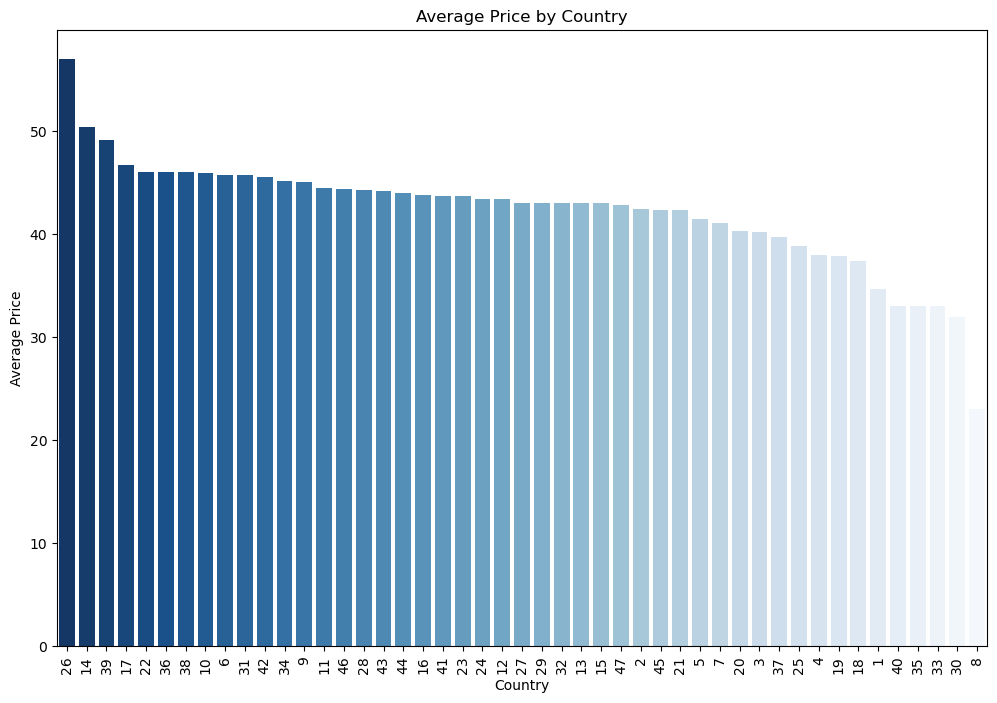

In [19]:
# 9 

# Avg price by country
plt.figure(figsize=(12, 8))    
country_price = df.groupby('country')['price'].mean().reset_index()
country_price = country_price.sort_values(by='price', ascending=False)

sns.barplot(x='country', y='price', data=country_price, palette='Blues_r',order=country_price['country'])
plt.xticks(rotation=90)
plt.title('Average Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.show()

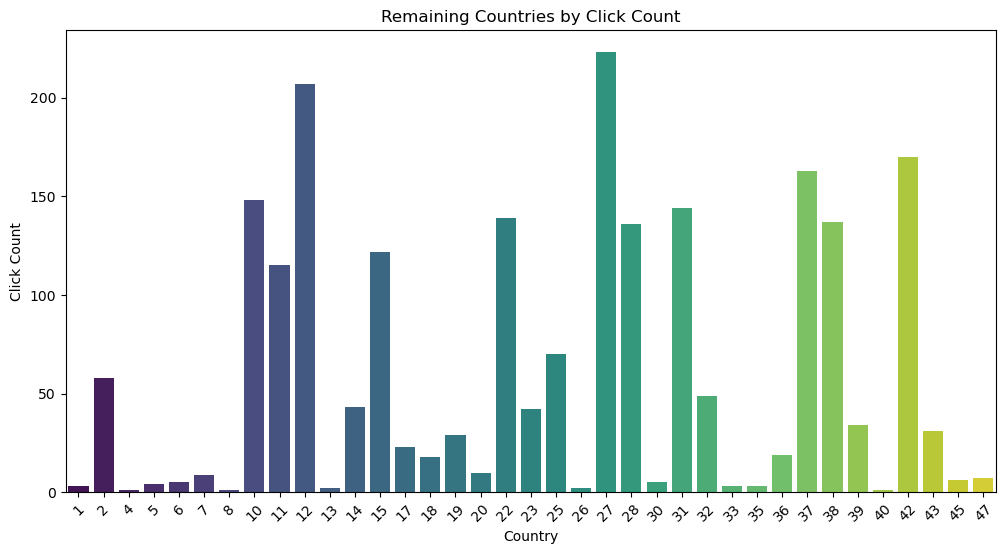

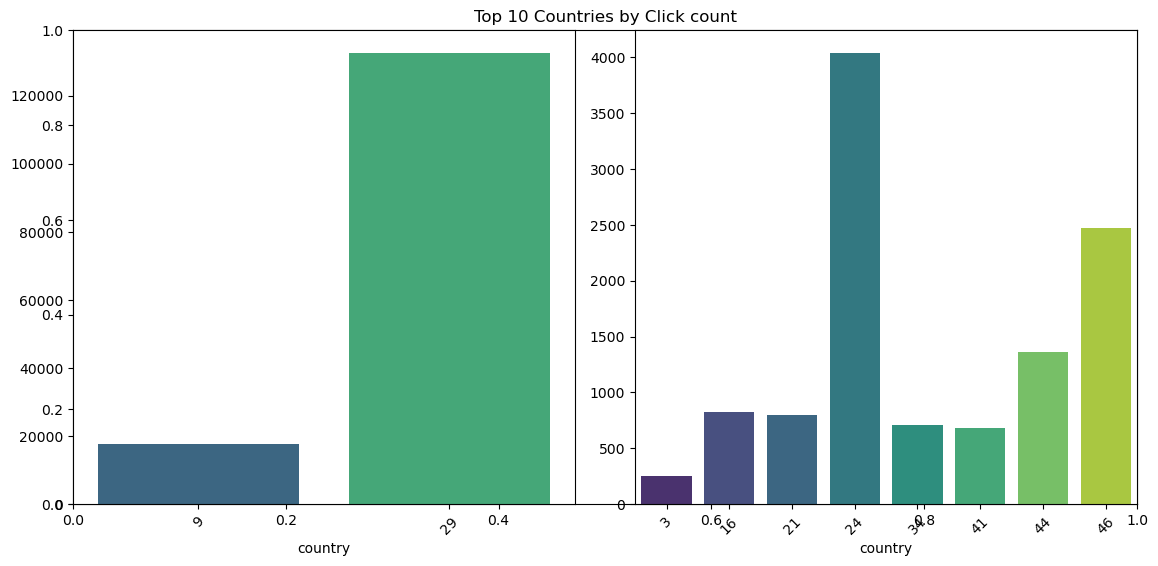

In [20]:
# Countries by their click counts (countries using our website)  
country_clicks = df['country'].value_counts()

# Get the top 10 countries by click count  
top_10_countries = country_clicks.head(10)  

# Get the remaining countries  
other_countries = country_clicks[~country_clicks.index.isin(top_10_countries.index)]  

# Create the second plot for the remaining countries  
plt.figure(figsize=(12, 6))  
sns.barplot(x=other_countries.index, y=other_countries.values, palette="viridis")  
plt.title("Remaining Countries by Click Count")  
plt.xlabel("Country")  
plt.ylabel("Click Count")  
plt.xticks(rotation=45)  
plt.show()
 

# Countries by their click counts (countries using our website)  
country_clicks = df['country'].value_counts()  

# Get the top 10 countries by click count  
top_10_countries = country_clicks.head(10)  

# Separate the top 2 and the remaining 8 countries  
top_2_countries = top_10_countries.head(2)  
other_8_countries = top_10_countries.iloc[2:]  


# Display the two plots side-by-side  
plt.figure(figsize=(12, 6))  
plt.title("Top 10 Countries by Click count")
plt.subplot(1, 2, 1)  
#plt.title("Top 2 Countries by Click Count")  
sns.barplot(x=top_2_countries.index, y=top_2_countries.values, palette="viridis")  
plt.xticks(rotation=45)  

plt.subplot(1, 2, 2)  
#plt.title("Top 3-10 Countries")  
sns.barplot(x=other_8_countries.index, y=other_8_countries.values, palette="viridis")  
plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

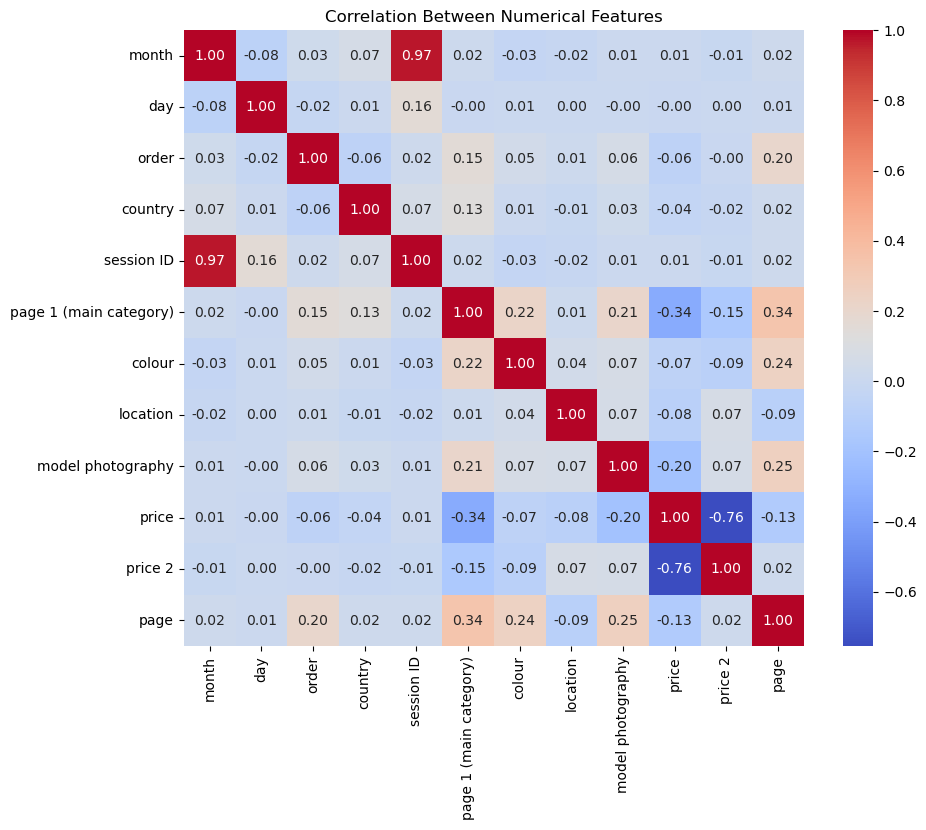

In [21]:
# 11

# Select only numerical columns and removing year as not relevant 
numerical_cols = df.select_dtypes(include=['int64']).drop(columns=['year'])

# Compute correlation matrix
correlation_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()


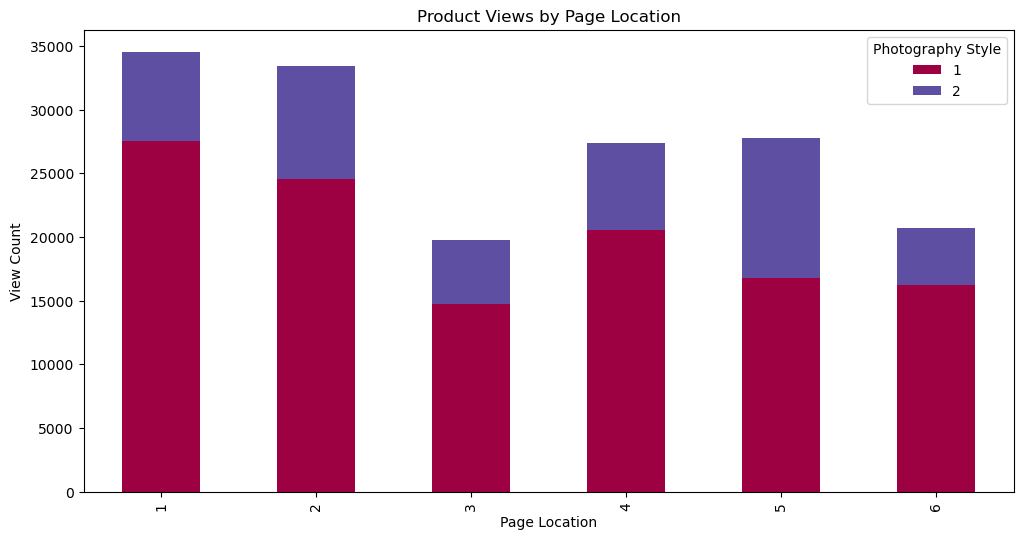

In [22]:
# 12

# Photography style with counts across page locations. 
location_views = df.groupby(['location', 'model photography']).size().unstack()
location_views.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Spectral')
plt.title("Product Views by Page Location")
plt.xlabel("Page Location")
plt.ylabel("View Count")
plt.legend(title="Photography Style")
plt.show()


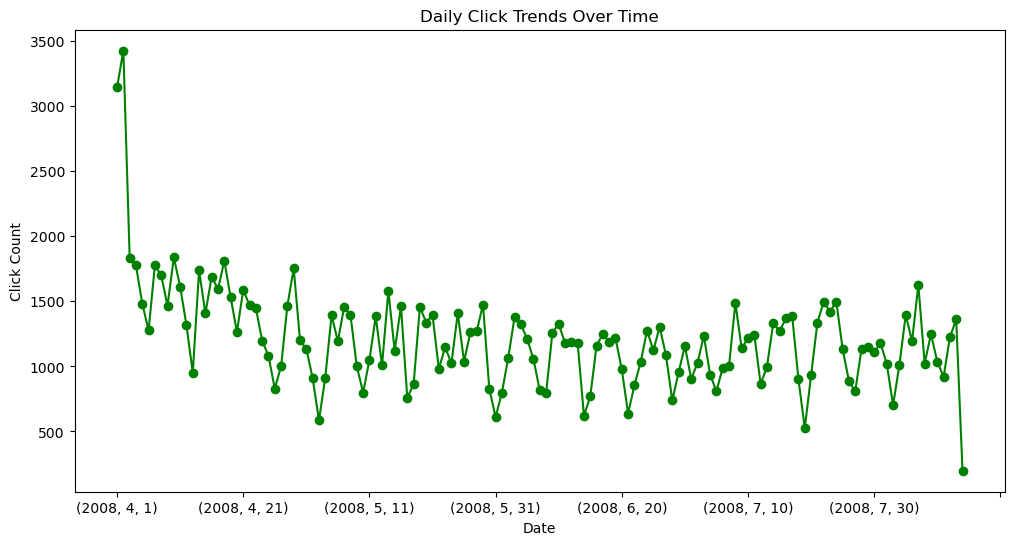

In [23]:
# 13

# Click trends
daily_clicks = df.groupby(['year', 'month', 'day']).size()
daily_clicks.plot(kind='line', figsize=(12, 6), color='green', marker='o')
plt.title("Daily Click Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Click Count")
plt.show()


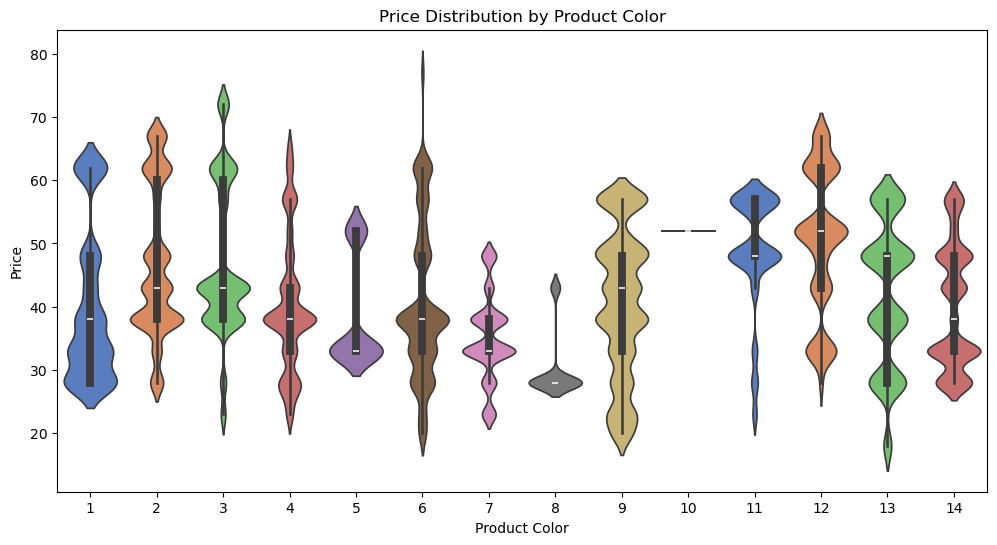

In [24]:
# 14 

# Colour with Price distribution 
# shows: How Prices Vary by Product Color
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='colour', y='price', palette="muted")
plt.title("Price Distribution by Product Color")
plt.xlabel("Product Color")
plt.ylabel("Price")
plt.show()

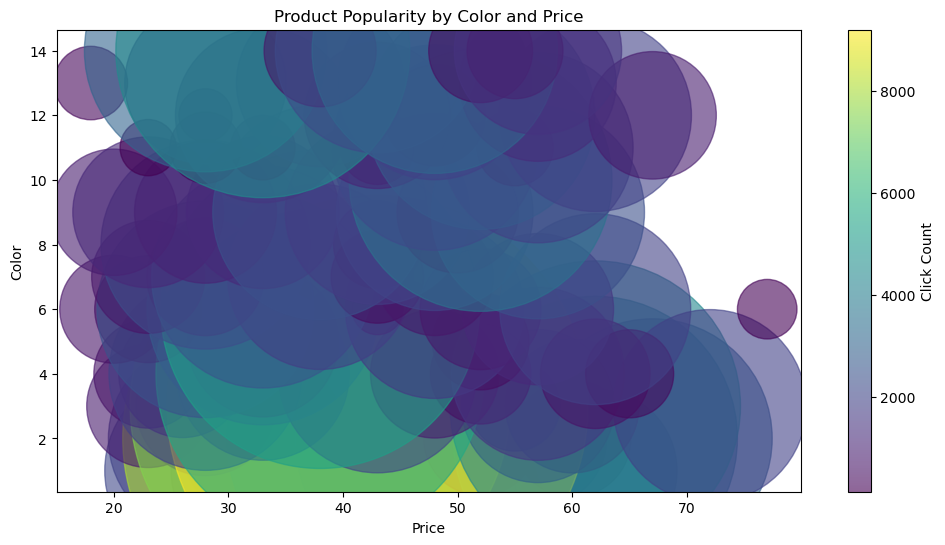

In [25]:
# 15 

# Shows: Most count of colours with it's price  
# shows: Shows which colour has been bought the most with their price
# using count of each color with their price 
# example: Black colour was bought 2 times once at $10, once at $50

color_price = df.groupby(['colour', 'price']).size().reset_index(name='click_count')
plt.figure(figsize=(12, 6))
plt.scatter(color_price['price'], color_price['colour'], s=color_price['click_count']*10, alpha=0.6, c=color_price['click_count'], cmap='viridis')
plt.title("Product Popularity by Color and Price")
plt.xlabel("Price")
plt.ylabel("Color")
plt.colorbar(label="Click Count")
plt.show()


# Predictive & Recommendation Machine Learning Model

### Let's Start Building a Recommendation System. 

# Branch 1: 
## Memory Based Recommendation using Light Gradient-Boosting Machine (Light GBM) model

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, label_binarize
from imblearn.over_sampling import ADASYN
import warnings
import time

warnings.filterwarnings('ignore')

# Start Timer
start_time = time.time()

# Load Dataset
file_path = 'e-shop_clothing_2008.csv'
data = pd.read_csv(file_path)

print("---- File Read Successfully. DataFrame 'data' is ready to use... ----")


---- File Read Successfully. DataFrame 'data' is ready to use... ----


### Preparing Data : Target Variable selection, Encoding, Test-Train split and data imbalance handling 
### Target Variable: Country

In [27]:
data_prep_start_time = time.time()

# Drop Rare Classes
min_samples_threshold = 10
rare_classes = data['country'].value_counts()[data['country'].value_counts() < min_samples_threshold].index
data_filtered = data[~data['country'].isin(rare_classes)]
data_sampled = data_filtered.groupby('country').sample(frac=1, random_state=42)

# Features and Target
X = data_sampled.drop(columns=['colour'])
y = data_sampled['colour']

# Encode Target Variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identify Numeric and Categorical Features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

# Handle Class Imbalance with ADASYN
adasyn = ADASYN(random_state=42, n_neighbors=3)
X_train_resampled, y_train_resampled = adasyn.fit_resample(
    preprocessor.fit_transform(X_train), 
    y_train
)

data_prep_end_time = time.time()
print("---- Data preparation completed for target variable = 'colour' ... ----")
print(f"\nTime Taken for Data Prepration --> {data_prep_end_time - data_prep_start_time:.3f} seconds "
      f"({(data_prep_end_time - data_prep_start_time)/60:.3f}) minutes")

---- Data preparation completed for target variable = 'colour' ... ----

Time Taken for Data Prepration --> 3551.770 seconds (59.196) minutes


### Model Predictions and Evaluations 

In [29]:
modelStartTime = time.time()



# Train LightGBM Model
 

lgb_model = LGBMClassifier(
    random_state=42,
    class_weight='balanced', # to increase model accuracy and performance by adjusting class weights 
    device='cpu',
    max_depth=3,
    n_estimators=4,
    learning_rate=0.06,
    verbosity=-1
)


lgb_model.fit(X_train_resampled, y_train_resampled)

# Evaluate LightGBM
y_pred_lgb = lgb_model.predict(preprocessor.transform(X_test))
y_proba_lgb = lgb_model.predict_proba(preprocessor.transform(X_test))

modelEndTime = time.time()
train_score = lgb_model.score(X_train_resampled, y_train_resampled)
test_score = lgb_model.score(preprocessor.transform(X_test), y_test)

print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")




  


if train_score > test_score + 0.1:
    print("The model is overfitting.")
    
    
elif test_score > train_score:
    print("The model is underfitting.")

else:
    print("The model is well-fit.")

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))









unique_classes = np.unique(y_encoded)
if len(unique_classes) > 2:
    # multi-class scenario
    y_test_bin = label_binarize(y_test, classes=unique_classes)
    from sklearn.metrics import roc_auc_score
    roc_auc_lgb = roc_auc_score(y_test_bin, y_proba_lgb, multi_class='ovr')
    print(f"LightGBM ROC AUC Score: {roc_auc_lgb:.2f}")
else:
    # binary scenario
    from sklearn.metrics import roc_auc_score
    roc_auc_lgb = roc_auc_score(y_test, y_proba_lgb[:,1])
    print(f"LightGBM ROC AUC Score: {roc_auc_lgb:.2f}")


# Calculate Individual AUC Scores
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
individual_auc_scores = []

for i in range(y_proba_lgb.shape[1]):
    auc_score = roc_auc_score(y_test_bin[:, i], y_proba_lgb[:, i])
    individual_auc_scores.append((i, auc_score))

# Print Individual AUC Scores
for class_id, auc in individual_auc_scores:
    print(f"Class {class_id} AUC: {auc:.2f}")

    
#End Time Record
end_time = time.time()
print(f"Time Taken (Model) --> {modelEndTime - modelStartTime:.3f} seconds ({(modelEndTime - modelStartTime)/60:.3f}) minutes")
print(f"Total Time for Analysis --> {end_time - start_time:.3f} seconds ({(end_time - start_time)/60:.3f}) minutes")


Train Score: 0.89
Test Score: 0.80
The model is well-fit.
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      1557
           1       0.63      0.50      0.56      5951
           2       0.87      0.99      0.92      5850
           3       0.85      0.69      0.76      3303
           4       1.00      1.00      1.00       333
           5       0.95      0.66      0.78      3494
           6       1.00      0.97      0.99      1374
           7       1.00      1.00      1.00       533
           8       0.50      1.00      0.66      2705
           9       1.00      1.00      1.00       716
          10       1.00      0.94      0.97      1058
          11       1.00      0.98      0.99      1765
          12       1.00      0.93      0.97      1259
          13       1.00      0.62      0.76      3187

    accuracy                           0.80     33085
   macro avg       0.89      0.88      0.87 

### Model Outputs and Vizualizations 

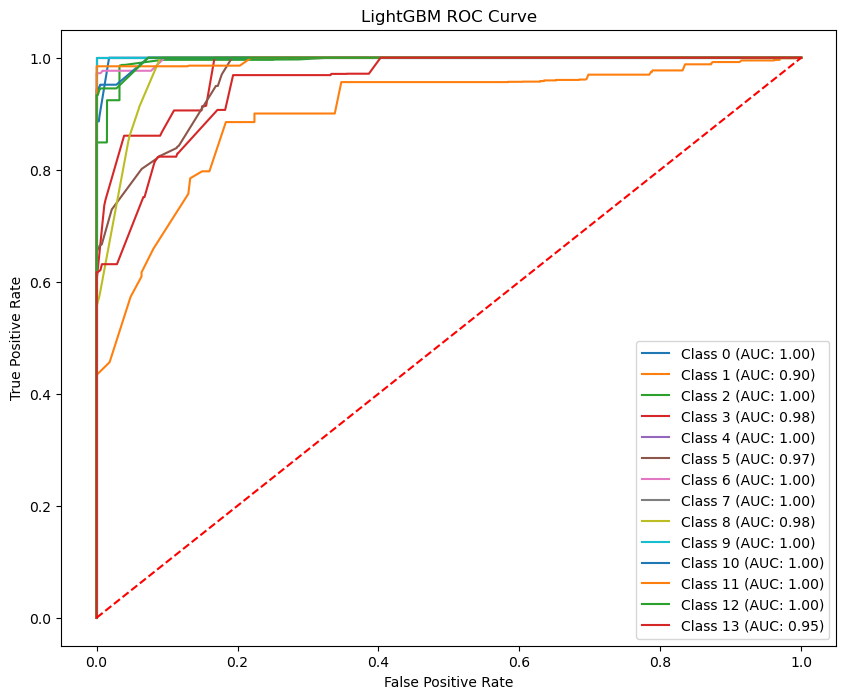

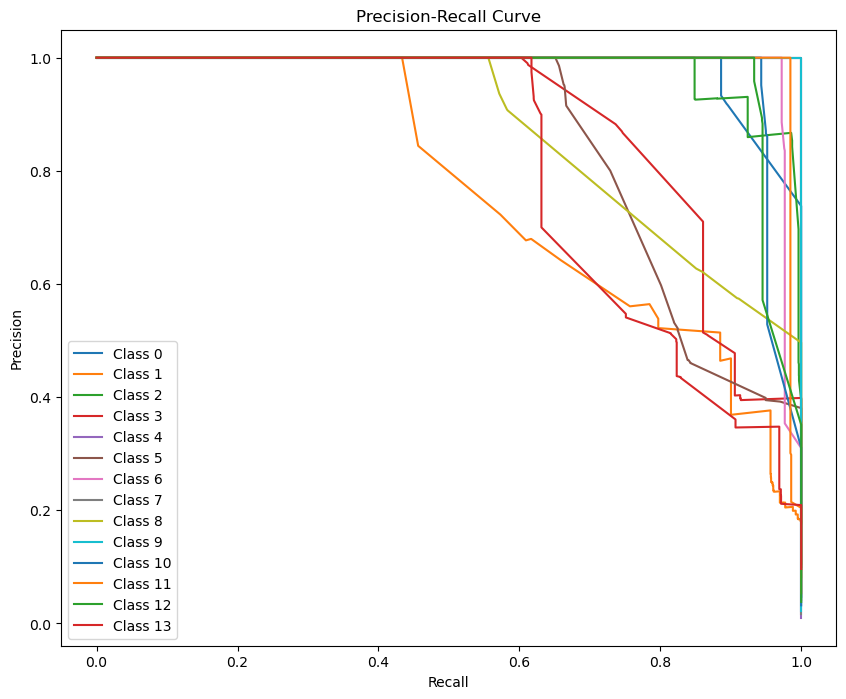

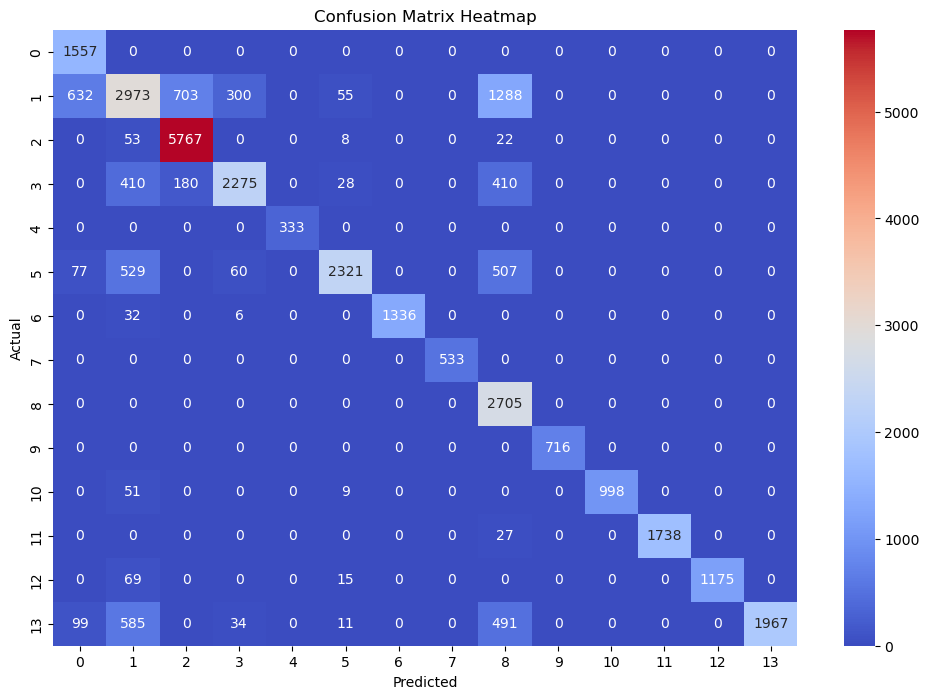

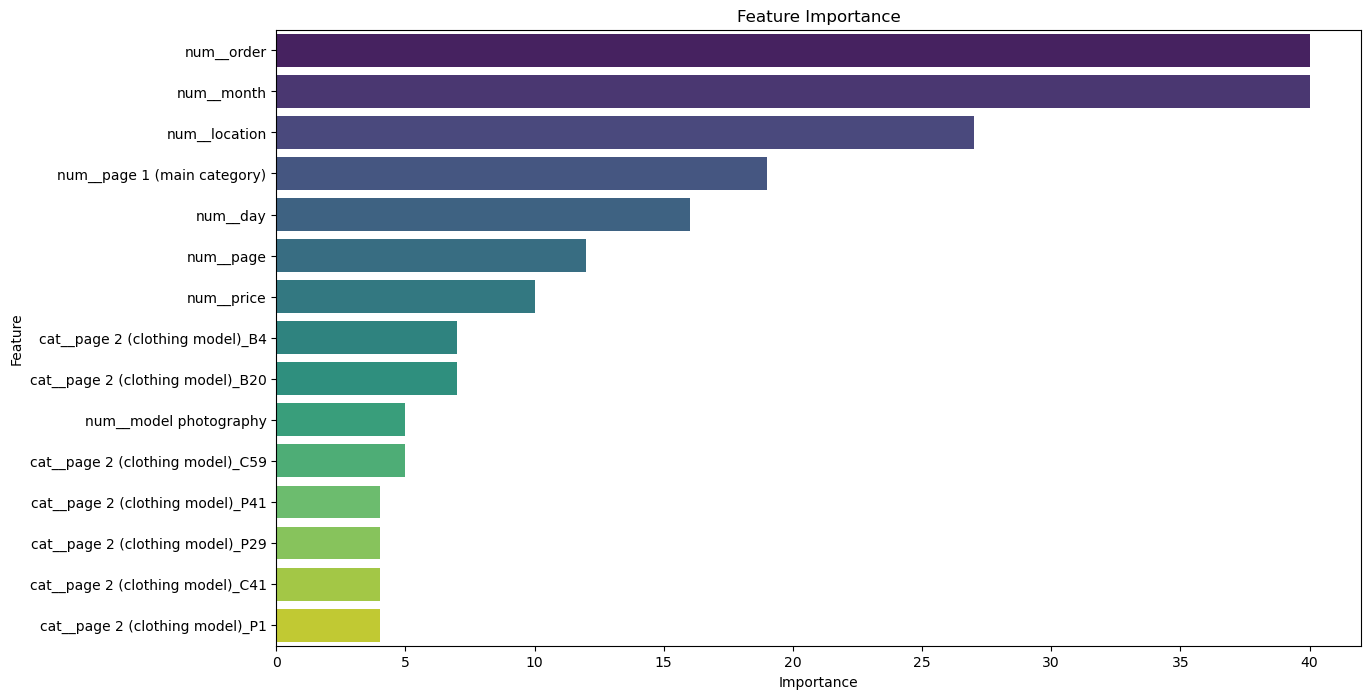

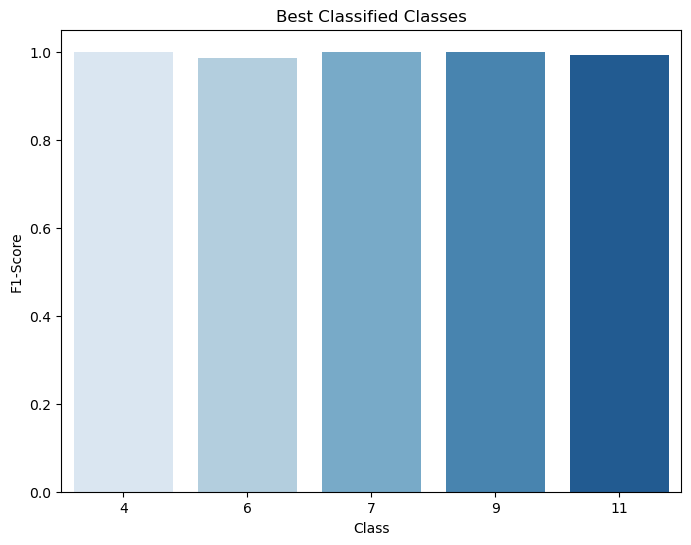

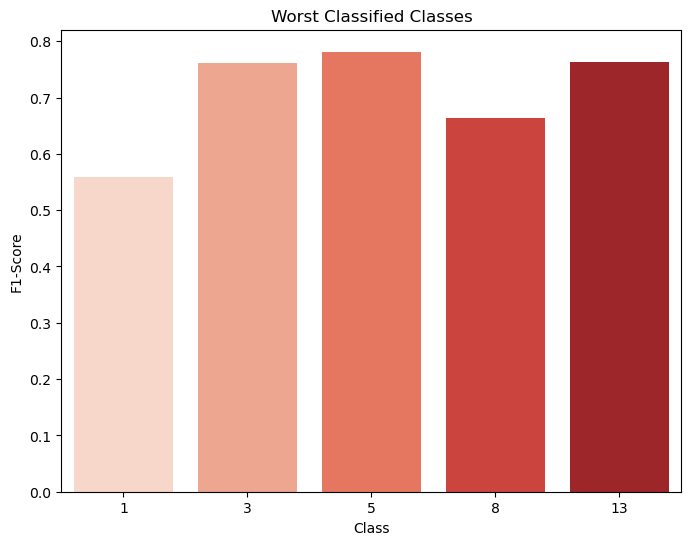

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve, accuracy_score


# Visualization: ROC Curve
plt.figure(figsize=(10, 8))
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_lgb[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC: {roc_auc_score(y_test_bin[:, i], y_proba_lgb[:, i]):.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LightGBM ROC Curve")
plt.legend(loc='lower right')
plt.show()


# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_lgb[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc='lower left')
plt.show()




# Confusion Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_lgb), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Feature Importances
importances = lgb_model.feature_importances_  # Retrieve feature importances from the model

# Ensure importances align with the feature names
feature_names = preprocessor.get_feature_names_out()

if len(importances) > len(feature_names):
    importances = importances[:len(feature_names)]

# Sort features by importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Take the top 15 important features
top_15_importances = importance_df.head(15)

# Feature Importance Visualization
plt.figure(figsize=(14, 8))
sns.barplot(x=top_15_importances['Importance'],  y=top_15_importances['Feature'], palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Best Classified Classes (Based on F1-Score)
classification_metrics = classification_report(y_test, y_pred_lgb, output_dict=True)
class_metrics = [
    {'Class': int(class_id), 'F1-Score': metrics['f1-score']}
    for class_id, metrics in classification_metrics.items()
    if class_id.isdigit()
]

# Convert Metrics to DataFrame
metrics_df = pd.DataFrame(class_metrics)

# Best and Worst Classes
best_df = metrics_df.nlargest(5, 'F1-Score')
worst_df = metrics_df.nsmallest(5, 'F1-Score')

# Best Classified Classes
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='F1-Score', data=best_df, palette='Blues')
plt.title('Best Classified Classes')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.show()

# Worst Classified Classes
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='F1-Score', data=worst_df, palette='Reds')
plt.title('Worst Classified Classes')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.show()





Recommendation Probability Array:
 [0.06554829 0.08836093 0.06540074 0.07417493 0.06365925 0.07793781
 0.07389334 0.06365517 0.06521692 0.06365093 0.07241458 0.07537243
 0.07336108 0.0773536 ]
Top 10 Classes (Encoded Indices): [ 1  5 13 11  3  6 12 10  0  2]

Top 10 Recommendations (Label, Probability):
 Label  Probability
 Black     0.088361
  Gray     0.077938
 White     0.077354
   Red     0.075372
 Brown     0.074175
 Green     0.073893
Violet     0.073361
  Pink     0.072415
 Beige     0.065548
  Blue     0.065401


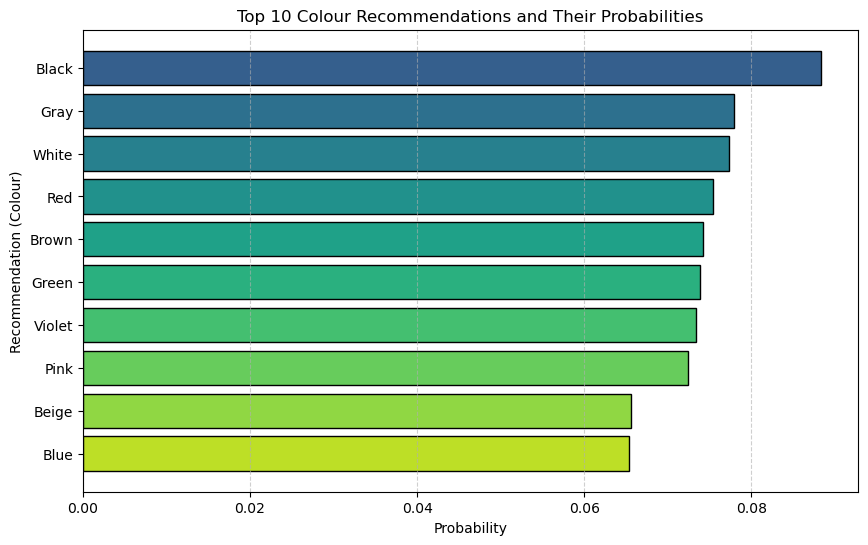

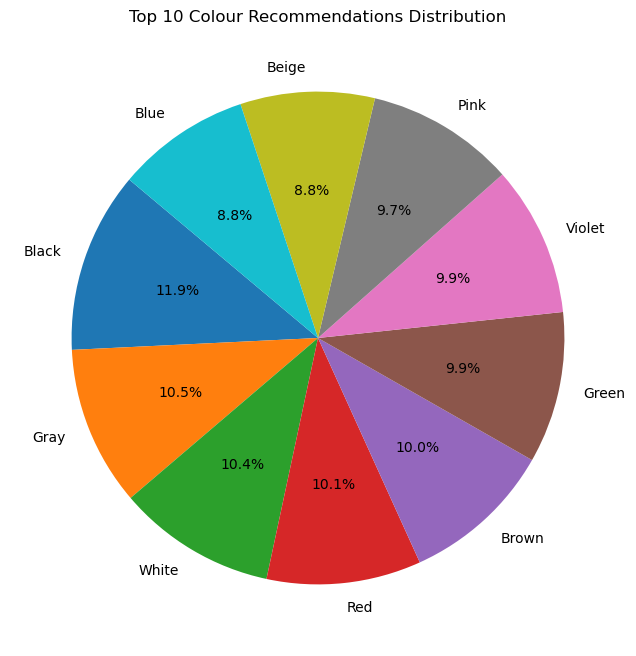


----- Recommendation System Completed -----

Time Taken for Analysis --> 16276.610 seconds (271.277) minutes


In [31]:
# Recommendation Code
# Assuming you want to predict top classes for a single new row
df_Mapped_with_Values = data.copy()

# Create a dictionary for value mapping
mapping_dict = {
    "country": {
        1: "Australia", 2: "Austria", 3: "Belgium", 4: "British Virgin Islands", 5: "Cayman Islands", 
        6: "Christmas Island", 7: "Croatia", 8: "Cyprus", 9: "Czech Republic", 10: "Denmark", 
        11: "Estonia", 12: "Unidentified", 13: "Faroe Islands", 14: "Finland", 15: "France", 
        16: "Germany", 17: "Greece", 18: "Hungary", 19: "Iceland", 20: "Lithuania", 21: "Ireland", 
        22: "Italy", 23: "Latvia", 24: "India", 25: "Luxembourg", 26: "Mexico", 27: "Netherlands", 
        28: "Norway", 29: "Poland", 30: "Portugal", 31: "Romania", 32: "Russia", 33: "San Marino", 
        34: "Slovakia", 35: "Slovenia", 36: "Spain", 37: "Sweden", 38: "Switzerland", 39: "Ukraine", 
        40: "United Arab Emirates", 41: "United Kingdom", 42: "USA", 43: "biz (*.biz)", 44: "com (*.com)", 
        45: "int (*.int)", 46: "net (*.net)", 47: "org (*.org)"
    },
    "page 1 (main category)": {
        1: "Trousers", 2: "Skirts", 3: "Blouses", 4: "Sale"
    },
    "colour": {
        1: "Beige", 2: "Black", 3: "Blue", 4: "Brown", 5: "Burgundy", 6: "Gray", 7: "Green", 
        8: "Navy Blue", 9: "Of Many Colors", 10: "Olive", 11: "Pink", 12: "Red", 13: "Violet", 14: "White"
    },
    "location": {
        1: "Top Left", 2: "Top in the Middle", 3: "Top Right", 4: "Bottom Left", 5: "Bottom in the Middle", 6: "Bottom Right"
    },
    "model photography": {
        1: "En Face", 2: "Profile"
    },
    "price 2": {
        1: "Yes", 2: "No"
    },
    "page": {
        1: "Page 1", 2: "Page 2", 3: "Page 3", 4: "Page 4", 5: "Page 5"
    }
}


def get_mapped_value(column, value):
    if column in mapping_dict:
        return mapping_dict[column].get(value, f"Unknown {column} value")
    else:
        return f"Unknown column {column}"

#new user -> recommending the colours 
    
# Example new data point
new_data_point = pd.DataFrame({
    'year': [2008],
    'month': [4],
    'day': [15],
    'price': [40],
    'order': [5],
    'country': [1],
    'page 1 (main category)': [2],
    'page 2 (clothing model)': ['A13'],
    'location': [2],
    'model photography': [1],
    'price 2': [1],
    'page': [2],
})

# (A) Add missing columns with placeholder values
for col in X.columns:
    if col not in new_data_point.columns:
        new_data_point[col] = 0

# (B) Convert numeric features to float ONLY if they exist and truly numeric
for col in numeric_features:
    if col in new_data_point.columns:
        try:
            new_data_point[col] = new_data_point[col].astype(float)
        except ValueError as e:
            print(f"Warning: Could not convert '{col}' to float. Contains non-numeric data.")
            print(e)

# (C) Convert categorical features to string
for col in categorical_features:
    if col in new_data_point.columns:
        new_data_point[col] = new_data_point[col].astype(str)

# (D) Transform and predict probabilities for all classes
new_data_scaled = preprocessor.transform(new_data_point)
prediction_proba = lgb_model.predict_proba(new_data_scaled)[0]  # Probability array

# (E) Select top 10 probable classes
top_10_indices = np.argsort(prediction_proba)[::-1][:10]

mapped_top_10 = []
for idx in top_10_indices:
    # numeric label -> color integer via inverse transform
    colour_integer = le.inverse_transform([idx])[0]  
    probability = prediction_proba[idx]
    # Map that integer to the dictionary
    mapped_colour_name = get_mapped_value("colour", colour_integer)
    mapped_top_10.append((mapped_colour_name, probability))

recommendations_df = pd.DataFrame(mapped_top_10, columns=["Label", "Probability"])

# Print Probability Array
print("\nRecommendation Probability Array:\n", prediction_proba)
print("Top 10 Classes (Encoded Indices):", top_10_indices)
print("\nTop 10 Recommendations (Label, Probability):")
print(recommendations_df.to_string(index=False))

# Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(
    recommendations_df["Label"], 
    recommendations_df["Probability"], 
    color=plt.cm.viridis(np.linspace(0.3, 0.9, len(recommendations_df))),
    edgecolor='black'
)
plt.xlabel("Probability")
plt.ylabel("Recommendation (Colour)")
plt.title("Top 10 Colour Recommendations and Their Probabilities")
plt.gca().invert_yaxis()  # Highest prob at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    recommendations_df["Probability"],
    labels=recommendations_df["Label"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("Top 10 Colour Recommendations Distribution")
plt.show()

print("\n----- Recommendation System Completed -----")

end_time = time.time()
print(f"\nTime Taken for Analysis --> {end_time - start_time:.3f} seconds "
      f"({(end_time - start_time)/60:.3f}) minutes")

# Branch 2: 
## Collaborative Filtering using User Item interaction, Light Gradient-Boosting Machine (Light GBM) and Single Value Decomposition (SVD)

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from imblearn.over_sampling import SMOTE
import time
import warnings

warnings.filterwarnings('ignore')

start_time = time.time()


file_path = 'e-shop_clothing_2008.csv'
data = pd.read_csv(file_path)

print("---- File Read Successfully. DataFrame 'data' is ready to use... ----")

---- File Read Successfully. DataFrame 'data' is ready to use... ----


### Data Preperation (Dropping Rare Classes)

In [33]:
# Drop Rare Classes  
min_samples_threshold = 10  
rare_classes = data['country'].value_counts()[data['country'].value_counts() < min_samples_threshold].index  
data_filtered = data[~data['country'].isin(rare_classes)]  


data_sampled = data_filtered.groupby('country').sample(frac=1, random_state=123)  
print("---- Dropping Rare Classes completed ... ----")

---- Dropping Rare Classes completed ... ----


#### Collaborative Filtering Preparation : user-item interaction calculation + SVD (Dimention reductions)

In [34]:
user_item_start_time = time.time()

# (3) Collaborative Filtering Preparation
interaction_matrix = data_sampled.pivot_table(
    index='session ID',     # users
    columns='colour',       # items
    values='price',         # interaction value
    aggfunc='mean'
).fillna(0)

# Convert to sparse matrix
interaction_sparse = csr_matrix(interaction_matrix)

# SVD for Dimensionality Reduction
num_users, num_items = interaction_sparse.shape
print(f"Number of users: {num_users}, Number of items: {num_items}")

k = min(num_users, num_items) - 1  # Satisfies 0 < k < min(A.shape)
U, sigma, Vt = svds(interaction_sparse, k=k)
sigma = np.diag(sigma)

# Optional: Reconstruct matrix
reconstructed_matrix = np.dot(np.dot(U, sigma), Vt)

# Compute user and item similarity
user_similarity = cosine_similarity(U)
item_similarity = cosine_similarity(Vt)

unique_items = interaction_matrix.columns.unique()
print(f"Unique items: {unique_items}")

# (4) Add similarity features
def safe_get_loc(index, val):
    """Helper to safely get index location or return None if not found."""
    try:
        return index.get_loc(val)
    except KeyError:
        return None

data_sampled['user_similarity'] = data_sampled['session ID'].map(
    lambda x: np.mean(user_similarity[safe_get_loc(interaction_matrix.index, x)])
    if x in interaction_matrix.index else 0
)

data_sampled['item_similarity'] = data_sampled['page 1 (main category)'].map(
    lambda x: np.mean(item_similarity[safe_get_loc(interaction_matrix.columns, x)])
    if x in interaction_matrix.columns else 0
)

print("---- User and item similarities calculated successfully. ----")
user_item_end_time = time.time()


print(f"Time Taken (User-Item similarities) --> {user_item_end_time - user_item_start_time:.3f} seconds ({(user_item_end_time - user_item_start_time)/60:.3f}) minutes")

Number of users: 24007, Number of items: 14
Unique items: Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64', name='colour')
---- User and item similarities calculated successfully. ----
Time Taken (User-Item similarities) --> 39.146 seconds (0.652) minutes


### Preparing Data : Target Variable selection, Encoding, Creating processing pipeline, Test-Train split and data imbalance handling 
### Target Variable: Colour

In [35]:
data_prep_start_time = time.time()

# (5) Prepare For Model
X = data_sampled.drop(columns=['colour'])
y = data_sampled['colour']

# Encode Target Variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identify Numeric / Categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=123, 
    stratify=y_encoded
)

# (6) Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

print("---- Data preparation completed for target variable = Colour ... ----")

data_prep_end_time = time.time()
print("---- Data preparation completed for target variable = 'colour' ... ----")
print(f"\nTime Taken for Data Prepration --> {data_prep_end_time - data_prep_start_time:.3f} seconds "
      f"({(data_prep_end_time - data_prep_start_time)/60:.3f}) minutes")

---- Data preparation completed for target variable = Colour ... ----
---- Data preparation completed for target variable = 'colour' ... ----

Time Taken for Data Prepration --> 194.542 seconds (3.242) minutes


### Model Implementation 


In [37]:

# (7) Model Training (LightGBM)
modelStartTime = time.time()

lgb_model = LGBMClassifier(
    random_state=123,  
    class_weight='balanced',  
    max_depth=4,  
    n_estimators=5,
    learning_rate=0.01,
    verbosity=-1
)
lgb_model.fit(X_train_resampled, y_train_resampled)
modelEndTime = time.time()

print(f"Time Taken for Model --> {modelEndTime - modelStartTime:.3f} seconds "
      f"({(modelEndTime - modelStartTime)/60:.3f}) minutes")


Time Taken for Model --> 3.283 seconds (0.055) minutes


### Model Evaulations and outputs

In [38]:

train_score = lgb_model.score(X_train_resampled, y_train_resampled)
test_score = lgb_model.score(preprocessor.transform(X_test), y_test)
print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")

# Over/Underfitting Check
if train_score > test_score + 0.1:
    print("The model is overfitting.")
elif test_score > train_score:
    print("The model is underfitting.")
else:
    print("The model is well-fit.")

# (8) Evaluate Model
y_pred_lgb = lgb_model.predict(preprocessor.transform(X_test))
y_proba_lgb = lgb_model.predict_proba(preprocessor.transform(X_test))

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))

# Multi-class ROC AUC Score
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
roc_auc_lgb = roc_auc_score(y_test_bin, y_proba_lgb, multi_class='ovr')
print(f"LightGBM ROC AUC Score: {roc_auc_lgb:.2f}")


Train Score: 0.81
Test Score: 0.75
The model is well-fit.
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1557
           1       0.51      0.63      0.56      5951
           2       1.00      0.99      0.99      5850
           3       0.84      0.59      0.69      3303
           4       1.00      1.00      1.00       333
           5       1.00      0.42      0.59      3494
           6       1.00      0.74      0.85      1374
           7       1.00      1.00      1.00       533
           8       0.40      1.00      0.57      2705
           9       1.00      1.00      1.00       716
          10       1.00      0.91      0.95      1058
          11       1.00      0.74      0.85      1765
          12       1.00      0.88      0.94      1259
          13       1.00      0.51      0.68      3187

    accuracy                           0.75     33085
   macro avg       0.90      0.81      0.83 

### Model Outputs and Vizualizations 

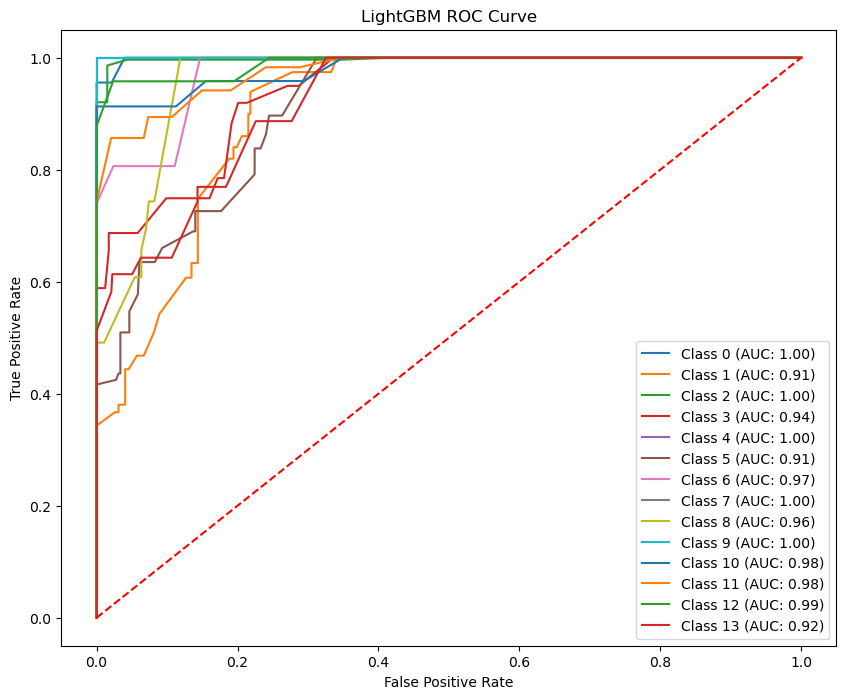

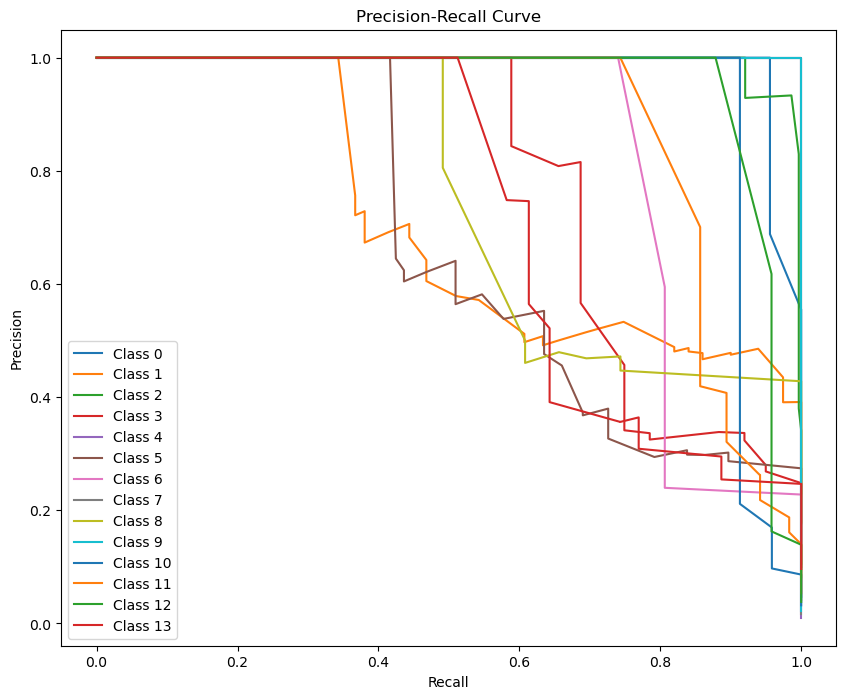

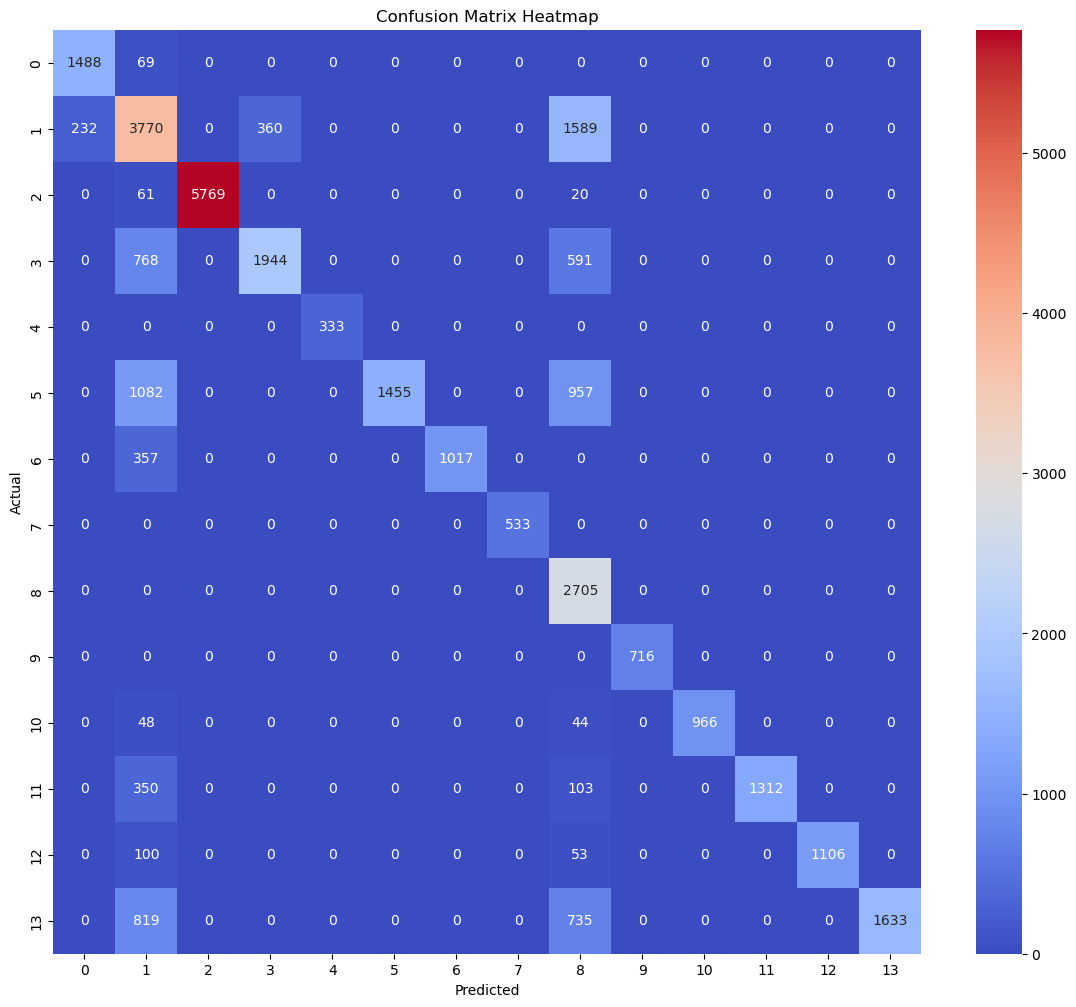

[[1488   69    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 232 3770    0  360    0    0    0    0 1589    0    0    0    0    0]
 [   0   61 5769    0    0    0    0    0   20    0    0    0    0    0]
 [   0  768    0 1944    0    0    0    0  591    0    0    0    0    0]
 [   0    0    0    0  333    0    0    0    0    0    0    0    0    0]
 [   0 1082    0    0    0 1455    0    0  957    0    0    0    0    0]
 [   0  357    0    0    0    0 1017    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  533    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 2705    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0  716    0    0    0    0]
 [   0   48    0    0    0    0    0    0   44    0  966    0    0    0]
 [   0  350    0    0    0    0    0    0  103    0    0 1312    0    0]
 [   0  100    0    0    0    0    0    0   53    0    0    0 1106    0]
 [   0  819    0    0    0    0    0    0  735    0

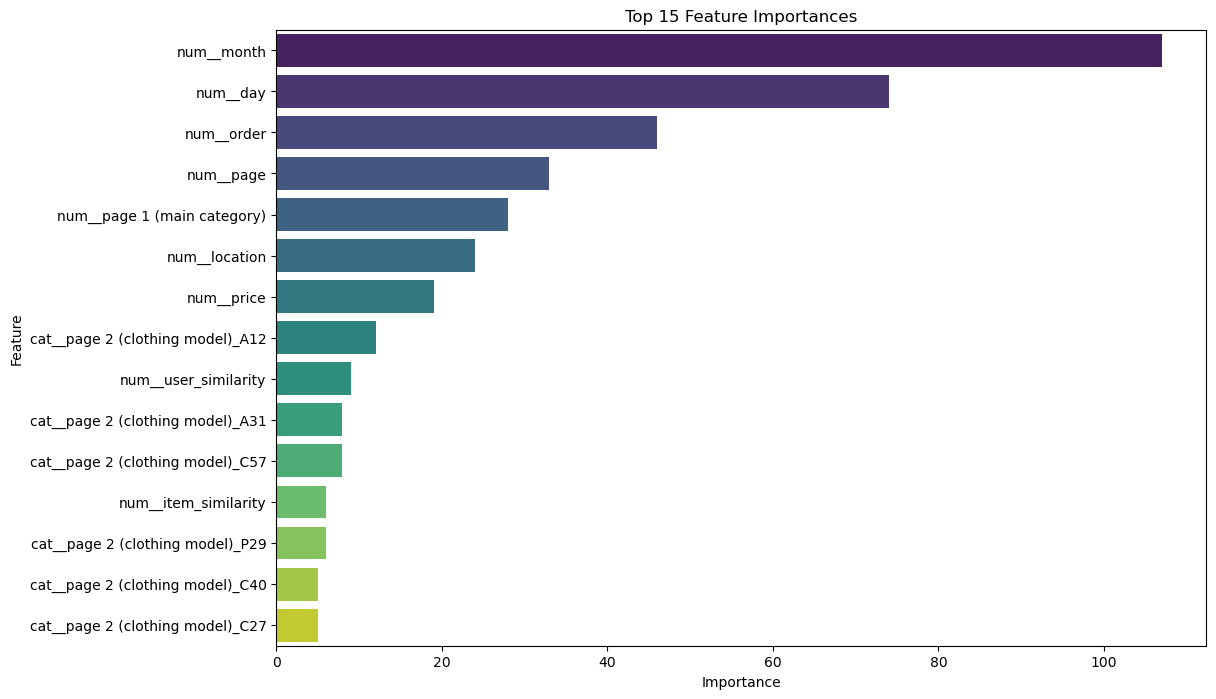

Best Classified Classes: [('4', {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 333.0}), ('7', {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 533.0}), ('9', {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 716.0}), ('2', {'precision': 1.0, 'recall': 0.9861538461538462, 'f1-score': 0.9930286599535244, 'support': 5850.0})]
Worst Classified Classes: [('5', {'precision': 1.0, 'recall': 0.41642816256439613, 'f1-score': 0.5879975752677309, 'support': 3494.0}), ('8', {'precision': 0.3979696925114021, 'recall': 1.0, 'f1-score': 0.5693538202483688, 'support': 2705.0}), ('1', {'precision': 0.5078125, 'recall': 0.6335069736178793, 'f1-score': 0.5637383177570093, 'support': 5951.0}), ('accuracy', 0.7479824693970077)]
   Class  F1-Score
0      5  1.000000
1      8  1.000000
2     10  1.000000
3      3  0.993029
   Class  F1-Score
0     14  0.677593
1      6  0.587998
2      9  0.569354
3      2  0.563738


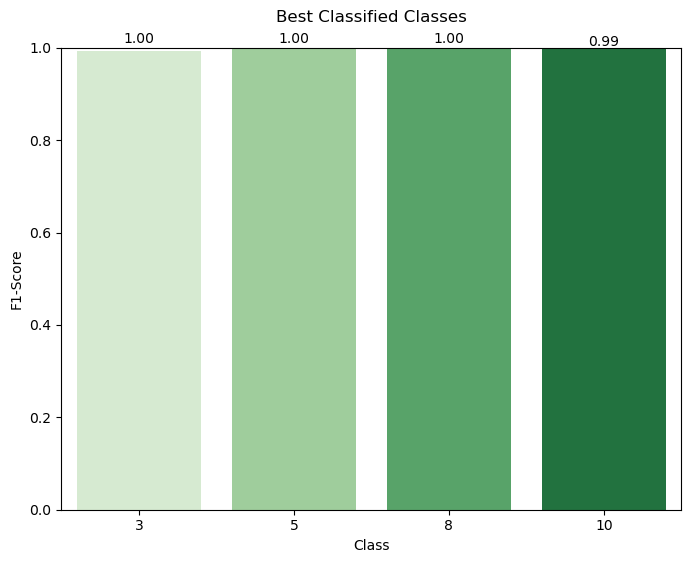

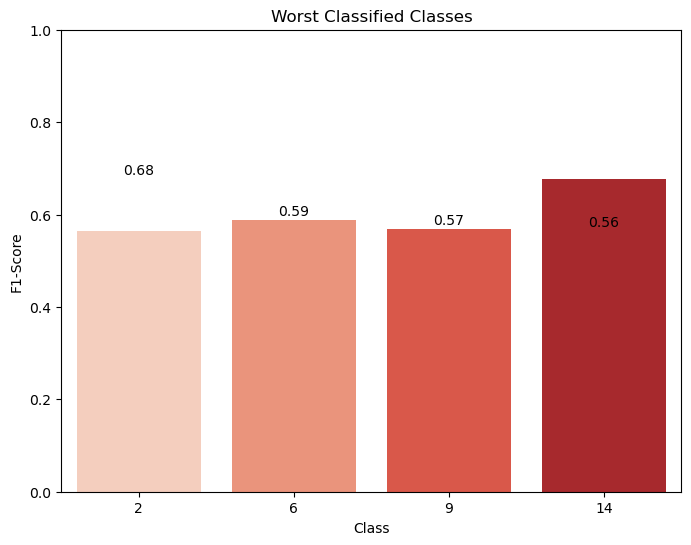

In [39]:

# Visualization: ROC Curve  
plt.figure(figsize=(10, 8))  
n_classes = len(np.unique(y_test))  
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))  
for i in range(n_classes):  
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_lgb[:, i])  
    plt.plot(fpr, tpr, label=f"Class {i} (AUC: {roc_auc_score(y_test_bin[:, i], y_proba_lgb[:, i]):.2f})")  
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlabel("False Positive Rate")  
plt.ylabel("True Positive Rate")  
plt.title("LightGBM ROC Curve")  
plt.legend(loc='lower right')  
plt.show()  

# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba_lgb[:, i])
    plt.plot(recall, precision, label=f"Class {i}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc='lower left')
plt.show()



# Confusion Matrix  
plt.figure(figsize=(14, 12))  
conf_matrix = confusion_matrix(y_test, y_pred_lgb)  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')  
plt.title("Confusion Matrix Heatmap")  
plt.xlabel("Predicted")  
plt.ylabel("Actual")  
plt.show()  

print(conf_matrix)


# Extract feature names from the preprocessor pipeline
feature_names = preprocessor.get_feature_names_out()

# Get feature importances from the LightGBM model
importances = lgb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Top Features Based on Importance:")
print(feature_importances_df.head(15))

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15), palette="viridis")
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Best and Worst Classified Classes
class_metrics = classification_report(y_test, y_pred_lgb, output_dict=True)
sorted_classes = sorted(class_metrics.items(), key=lambda x: x[1]['f1-score'] if isinstance(x[1], dict) else 0, reverse=True)
print("Best Classified Classes:", sorted_classes[:4])
print("Worst Classified Classes:", sorted_classes[-4:])


# Best and Worst Classified Classes
class_metrics = classification_report(y_test, y_pred_lgb, output_dict=True)

# Filter classes and sort by F1-Score
sorted_classes = sorted(
    [(k, v) for k, v in class_metrics.items() if isinstance(v, dict)],
    key=lambda x: x[1]['f1-score'],
    reverse=True
)

# Extract Best and Worst Classes
best_classes = sorted_classes[:4]
worst_classes = sorted_classes[-4:]

# Convert to DataFrames for Visualization
best_df = pd.DataFrame(
    {
        'Class': [le.inverse_transform([int(c[0])])[0] for c in best_classes],
        'F1-Score': [c[1]['f1-score'] for c in best_classes]
    }
)
worst_df = pd.DataFrame(
    {
        'Class': [le.inverse_transform([int(c[0])])[0] for c in worst_classes],
        'F1-Score': [c[1]['f1-score'] for c in worst_classes]
    }
)

print(best_df.head(5))
print(worst_df.head(5))


# Plot Best Classified Classes
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='F1-Score', data=best_df, palette='Greens')
for i, score in enumerate(best_df['F1-Score']):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', fontsize=10, color='black')
plt.title("Best Classified Classes\n")
plt.ylim(0, 1)
plt.xlabel("Class")
plt.ylabel("F1-Score")
plt.show()

# Plot Worst Classified Classes
plt.figure(figsize=(8, 6))
sns.barplot(x='Class', y='F1-Score', data=worst_df, palette='Reds')
for i, score in enumerate(worst_df['F1-Score']):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', fontsize=10, color='black')
plt.title("Worst Classified Classes")
plt.ylim(0, 1)
plt.xlabel("Class")
plt.ylabel("F1-Score")
plt.show()



### Testing the Recommendation System


--- Testing Recommendation Code ---

Top-10 Probability Array: [0.10905418 0.07006037 0.06764317 0.06962349 0.06744965 0.06990809
 0.06870473 0.06745092 0.06751549 0.06745202 0.06808277 0.06873386
 0.06863735 0.06968391]
Top 10 Classes (Encoded Indices): [ 0  1  5 13  3 11  6 12 10  2]

Top 10 Recommendations (Label, Probability):
 Label  Probability
 Beige     0.109054
 Black     0.070060
  Gray     0.069908
 White     0.069684
 Brown     0.069623
   Red     0.068734
 Green     0.068705
Violet     0.068637
  Pink     0.068083
  Blue     0.067643


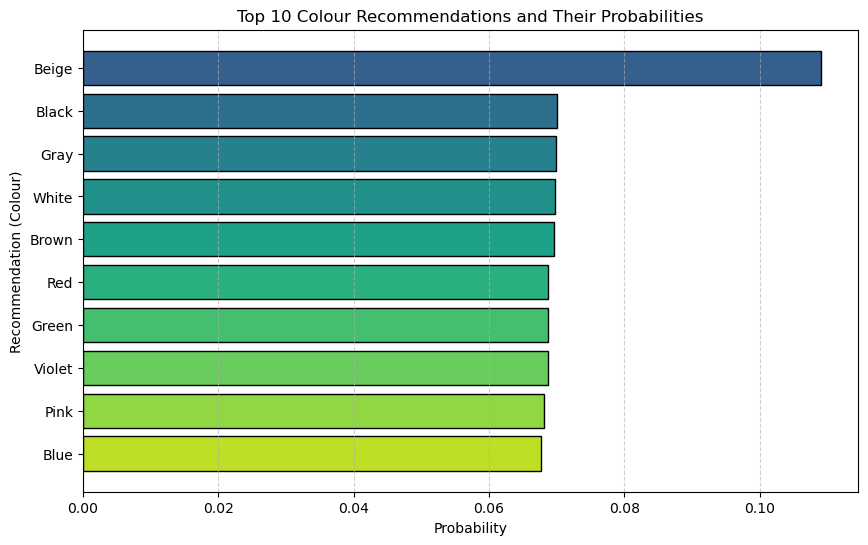

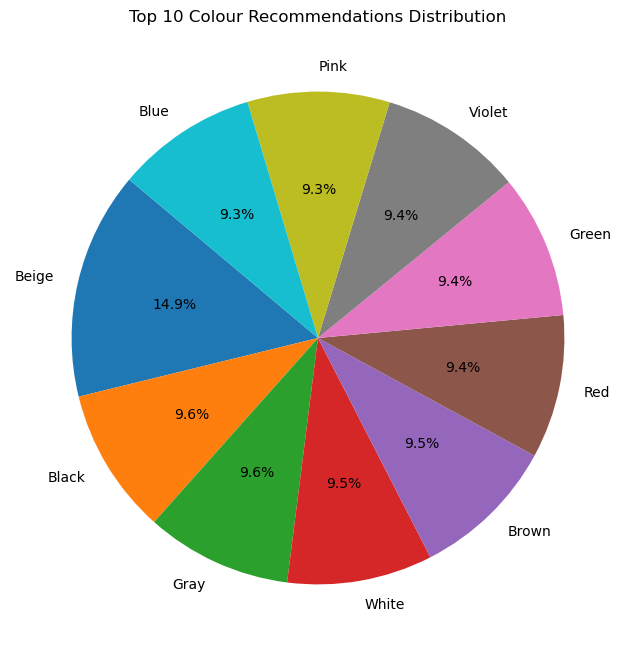

Top 10 Recommendations:
 Label  Probability
 Beige     0.109054
 Black     0.070060
  Gray     0.069908
 White     0.069684
 Brown     0.069623
   Red     0.068734
 Green     0.068705
Violet     0.068637
  Pink     0.068083
  Blue     0.067643

Time Taken for Analysis --> 322.807 seconds (5.380) minutes


In [40]:
# (9) Recommendation System Testing Code
print("\n--- Testing Recommendation Code ---\n")

# Recommendation Code
# Assuming you want to predict top classes for a single new row
df_Mapped_with_Values = data.copy()

# Create a dictionary for value mapping
mapping_dict = {
    "country": {
        1: "Australia", 2: "Austria", 3: "Belgium", 4: "British Virgin Islands", 5: "Cayman Islands", 
        6: "Christmas Island", 7: "Croatia", 8: "Cyprus", 9: "Czech Republic", 10: "Denmark", 
        11: "Estonia", 12: "Unidentified", 13: "Faroe Islands", 14: "Finland", 15: "France", 
        16: "Germany", 17: "Greece", 18: "Hungary", 19: "Iceland", 20: "Lithuania", 21: "Ireland", 
        22: "Italy", 23: "Latvia", 24: "India", 25: "Luxembourg", 26: "Mexico", 27: "Netherlands", 
        28: "Norway", 29: "Poland", 30: "Portugal", 31: "Romania", 32: "Russia", 33: "San Marino", 
        34: "Slovakia", 35: "Slovenia", 36: "Spain", 37: "Sweden", 38: "Switzerland", 39: "Ukraine", 
        40: "United Arab Emirates", 41: "United Kingdom", 42: "USA", 43: "biz (*.biz)", 44: "com (*.com)", 
        45: "int (*.int)", 46: "net (*.net)", 47: "org (*.org)"
    },
    "page 1 (main category)": {
        1: "Trousers", 2: "Skirts", 3: "Blouses", 4: "Sale"
    },
    "colour": {
        1: "Beige", 2: "Black", 3: "Blue", 4: "Brown", 5: "Burgundy", 6: "Gray", 7: "Green", 
        8: "Navy Blue", 9: "Of Many Colors", 10: "Olive", 11: "Pink", 12: "Red", 13: "Violet", 14: "White"
    },
    "location": {
        1: "Top Left", 2: "Top in the Middle", 3: "Top Right", 4: "Bottom Left", 5: "Bottom in the Middle", 6: "Bottom Right"
    },
    "model photography": {
        1: "En Face", 2: "Profile"
    },
    "price 2": {
        1: "Yes", 2: "No"
    },
    "page": {
        1: "Page 1", 2: "Page 2", 3: "Page 3", 4: "Page 4", 5: "Page 5"
    }
}

def get_mapped_value(column, value):
    if column in mapping_dict:
        return mapping_dict[column].get(value, f"Unknown {column} value")
    else:
        return f"Unknown column {column}"

# Example new data point
new_data_point = pd.DataFrame({
    'year': [2008],
    'month': [4],
    'day': [15],
    'order': [2],
    'country': [3],
    'session ID': [99999],
    'page 1 (main category)': [2],
    'page 2 (clothing model)': ['A13'],
    'location': [3],
    'model photography': [1],
    'price': [40],
    'price 2': [1],
    'page': [2],
    'user_similarity': [0.8],
    'item_similarity': [0.7]
})

# Fill missing columns
for col in X.columns:
    if col not in new_data_point.columns:
        new_data_point[col] = 0

# Convert numeric features to float (safe approach)
for col in numeric_features:
    if col in new_data_point.columns:
        try:
            new_data_point[col] = new_data_point[col].astype(float)
        except ValueError as e:
            print(f"Warning: Could not convert '{col}' to float. Column contains non-numeric data.")
            print(e)

# Convert categorical features to string
for col in categorical_features:
    if col in new_data_point.columns:
        new_data_point[col] = new_data_point[col].astype(str)

# Transform and get probabilities
new_data_scaled = preprocessor.transform(new_data_point)
prediction_proba = lgb_model.predict_proba(new_data_scaled)[0]

# Retrieve top-10 classes
top_10_indices = np.argsort(prediction_proba)[::-1][:10]

mapped_top_10 = []
for class_idx in top_10_indices:
    # inverse transform from numeric label to 'colour' integer
    colour_integer = le.inverse_transform([class_idx])[0]
    probability = prediction_proba[class_idx]
    # map that integer to a dictionary
    mapped_label = get_mapped_value("colour", colour_integer)
    mapped_top_10.append((mapped_label, probability))

recommendations_df = pd.DataFrame(mapped_top_10, columns=["Label", "Probability"])

# Show Probability Array
print("Top-10 Probability Array:", prediction_proba)
print("Top 10 Classes (Encoded Indices):", top_10_indices)
print("\nTop 10 Recommendations (Label, Probability):")
print(recommendations_df.to_string(index=False))

# Bar Chart for Top-10
plt.figure(figsize=(10, 6))
plt.barh(
    recommendations_df["Label"],
    recommendations_df["Probability"],
    color=plt.cm.viridis(np.linspace(0.3, 0.9, len(recommendations_df))),
    edgecolor='black'
)
plt.xlabel("Probability")
plt.ylabel("Recommendation (Colour)")
plt.title("Top 10 Colour Recommendations and Their Probabilities")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    recommendations_df["Probability"],
    labels=recommendations_df["Label"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab10.colors
)
plt.title("Top 10 Colour Recommendations Distribution")
plt.show()

print("Top 10 Recommendations:")
print(recommendations_df.to_string(index=False))

# End Time
end_time = time.time()
print(f"\nTime Taken for Analysis --> {end_time - start_time:.3f} seconds "
      f"({(end_time - start_time)/60:.3f}) minutes")

# Branch 3: 
## Item based collaborative filtering using K-Nearest Neighbour (KNN) 

### Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import time
import warnings

warnings.filterwarnings('ignore')  

start_time = time.time()


file_path = 'e-shop_clothing_2008.csv'
data = pd.read_csv(file_path)
print("---- File Read Successfully. DataFrame 'data' is ready to use... ----")


---- File Read Successfully. DataFrame 'data' is ready to use... ----


### Preparing Data : Adding Explicit Rating, Handling data, Interaction Matrix and Test-Train split

In [42]:

# (3) Add Explicit Ratings (Synthetic Example) by binning price
bins = [0, 20, 50, 100, 200, np.inf]
labels = [1, 2, 3, 4, 5]
data['explicit_rating'] = pd.cut(data['price'], bins=bins, labels=labels)
data['explicit_rating'] = pd.to_numeric(data['explicit_rating'], errors='coerce')

data_for_cf = data[['session ID', 'colour', 'explicit_rating']].dropna()

print("\nData for Collaborative Filtering (first rows):")
print(data_for_cf.head(5))

# Merge any duplicates by averaging ratings if the user has multiple rows for same item
print("\nMerging Duplicates...\n")
data_for_cf = data_for_cf.groupby(['session ID', 'colour']).agg({'explicit_rating': 'mean'}).reset_index()

# Analyze Ratings Skewness
skewness = data['explicit_rating'].skew()
kurtosis = data['explicit_rating'].kurt()
print(f"Skewness of Ratings: {skewness:.2f}")
print(f"Kurtosis of Ratings: {kurtosis:.2f}")


# (4) Create Interaction Matrix
interaction_matrix = data_for_cf.pivot_table(
    index='session ID',
    columns='colour',
    values='explicit_rating',
    aggfunc='mean'
).fillna(0)

print(f"\nInteraction Matrix Shape: {interaction_matrix.shape}")

rating_counts = data['explicit_rating'].value_counts()
print("\n------------ Distribution of Explicit Ratings ------------")
print(rating_counts)
print("------------ User-Item Interaction Matrix (head) ------------")
print(interaction_matrix.head(5))




Data for Collaborative Filtering (first rows):
   session ID  colour  explicit_rating
0           1       1                2
1           1       1                2
2           1      10                3
3           1       6                2
4           1       4                3

Merging Duplicates...

Skewness of Ratings: 0.72
Kurtosis of Ratings: -0.69

Interaction Matrix Shape: (24026, 14)

------------ Distribution of Explicit Ratings ------------
explicit_rating
2    117123
3     46638
1      1713
Name: count, dtype: int64
------------ User-Item Interaction Matrix (head) ------------
colour       1         2    3    4    5         6    7    8         9    10  \
session ID                                                                    
1           2.0  0.000000  0.0  3.0  2.0  2.333333  0.0  0.0  2.000000  3.0   
2           0.0  3.000000  2.0  0.0  0.0  0.000000  0.0  0.0  2.333333  0.0   
3           0.0  0.000000  0.0  2.0  0.0  2.000000  2.0  0.0  2.000000  0.0   
4      

###  Item Based Collaborative Filtering using KNN Implementation and Evaulations

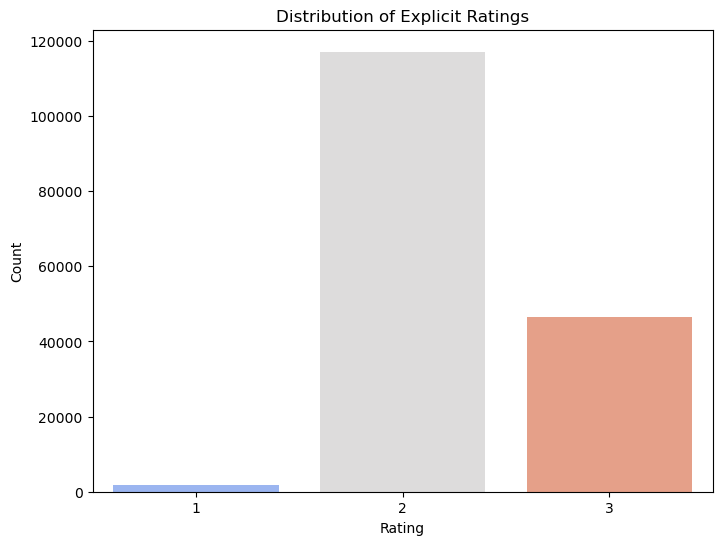

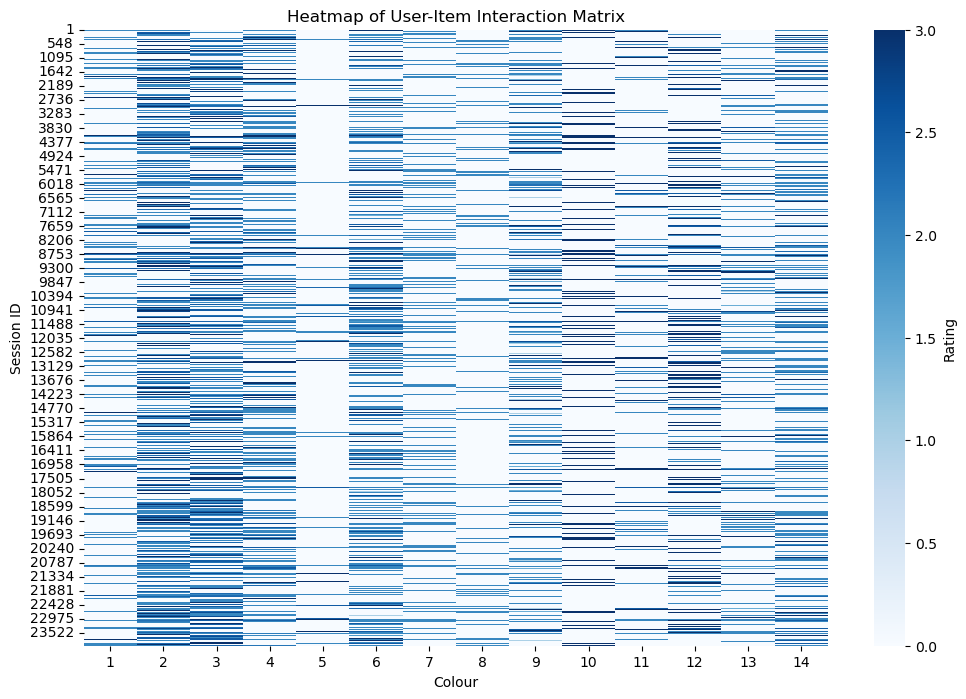

In [43]:
# (4) Create Interaction Matrix
interaction_matrix = data_for_cf.pivot_table(
    index='session ID',
    columns='colour',
    values='explicit_rating',
    aggfunc='mean'
).fillna(0)



# (5) Visualization of Distribution of Explicit Ratings
rating_counts = data['explicit_rating'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x=data['explicit_rating'], palette='coolwarm')
plt.title("Distribution of Explicit Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# (6) Heatmap of User-Item Interaction
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='Blues', cbar_kws={'label': 'Rating'})
plt.title("Heatmap of User-Item Interaction Matrix")
plt.xlabel("Colour")
plt.ylabel("Session ID")
plt.show()


### Model Outputs and Vizualizations

### Recommendations from the Analysis

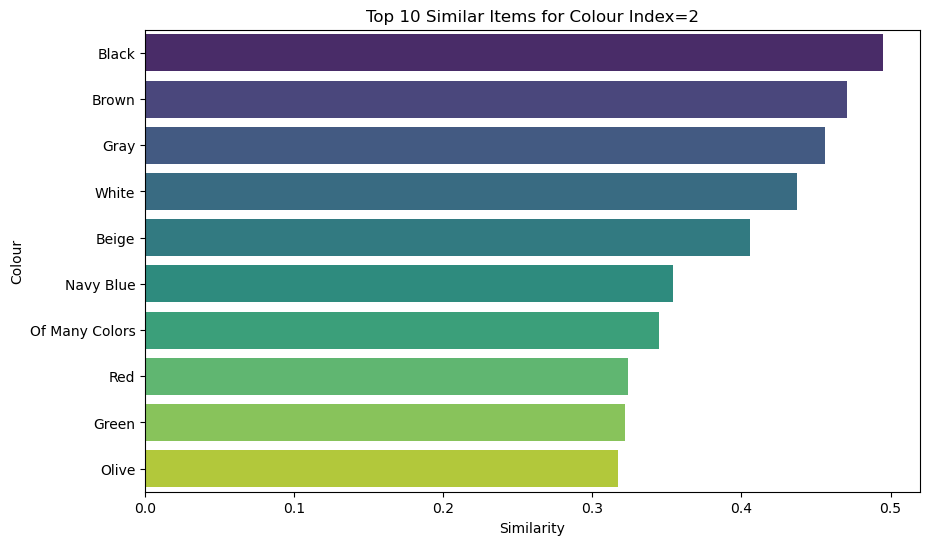


Top 10 Similar Items to item_idx=2:
          Item  Similarity
         Black       0.495
         Brown       0.471
          Gray       0.456
         White       0.437
         Beige       0.406
     Navy Blue       0.354
Of Many Colors       0.345
           Red       0.324
         Green       0.322
         Olive       0.317

Time Taken for Analysis --> 16.557 seconds (0.276) minutes


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import time

# ---------- Original Mapping Code (Unchanged) ----------
df_Mapped_with_Values = data.copy()



# 8) ITEM-BASED RECOMMENDATION
# We'll define a new 'item_matrix' => (items, users) for item-based similarity
item_matrix = interaction_matrix.T  # shape => (n_colours, n_users)


def get_similar_items(item_idx, top_n=5):
    """
    item_idx: zero-based index of the row in item_matrix
    top_n: number of similar items to retrieve
    """
    # Extract the target item row => shape (1, n_users)
    target_vector = item_matrix.iloc[item_idx].values.reshape(1, -1)
    all_vectors = item_matrix.values  # shape => (n_colours, n_users)

    # Cosine similarity
    sims = cosine_similarity(target_vector, all_vectors)[0]
    sorted_indices = np.argsort(sims)[::-1]
    # Exclude the item itself
    similar_items = [(idx, sims[idx]) for idx in sorted_indices if idx != item_idx]
    return similar_items[:top_n]

# EXAMPLE: We pick an item with index=2 => 'colour'=3 => "Blue" if 1..14 => item_idx+1
# but your data might differ, so just an example:
item_idx = 2
top_n = 10
similar_items = get_similar_items(item_idx, top_n=top_n)


# Create a dictionary for value mapping
mapping_dict = {
    "country": {
        1: "Australia", 2: "Austria", 3: "Belgium", 4: "British Virgin Islands", 5: "Cayman Islands", 
        6: "Christmas Island", 7: "Croatia", 8: "Cyprus", 9: "Czech Republic", 10: "Denmark", 
        11: "Estonia", 12: "Unidentified", 13: "Faroe Islands", 14: "Finland", 15: "France", 
        16: "Germany", 17: "Greece", 18: "Hungary", 19: "Iceland", 20: "Lithuania", 21: "Ireland", 
        22: "Italy", 23: "Latvia", 24: "India", 25: "Luxembourg", 26: "Mexico", 27: "Netherlands", 
        28: "Norway", 29: "Poland", 30: "Portugal", 31: "Romania", 32: "Russia", 33: "San Marino", 
        34: "Slovakia", 35: "Slovenia", 36: "Spain", 37: "Sweden", 38: "Switzerland", 39: "Ukraine", 
        40: "United Arab Emirates", 41: "United Kingdom", 42: "USA", 43: "biz (*.biz)", 44: "com (*.com)", 
        45: "int (*.int)", 46: "net (*.net)", 47: "org (*.org)"
    },
    "page 1 (main category)": {
        1: "Trousers", 2: "Skirts", 3: "Blouses", 4: "Sale"
    },
    "colour": {
        1: "Beige", 2: "Black", 3: "Blue", 4: "Brown", 5: "Burgundy", 6: "Gray", 7: "Green", 
        8: "Navy Blue", 9: "Of Many Colors", 10: "Olive", 11: "Pink", 12: "Red", 13: "Violet", 14: "White"
    },
    "location": {
        1: "Top Left", 2: "Top in the Middle", 3: "Top Right", 4: "Bottom Left", 5: "Bottom in the Middle", 6: "Bottom Right"
    },
    "model photography": {
        1: "En Face", 2: "Profile"
    },
    "price 2": {
        1: "Yes", 2: "No"
    },
    "page": {
        1: "Page 1", 2: "Page 2", 3: "Page 3", 4: "Page 4", 5: "Page 5"
    }
}

def get_mapped_value(column, value):
    if column in mapping_dict:
        return mapping_dict[column].get(value, f"Unknown {column} value")
    else:
        return f"Unknown column {column}"

def get_mapped_value(column, value):
    if column in mapping_dict:
        return mapping_dict[column].get(value, f"Unknown {column} value")
    else:
        return f"Unknown column {column}"

mapped_top_n = []
for (idx_i, sim_val) in similar_items:
    color_id = idx_i + 1  # zero-based => 1..14
    color_name = get_mapped_value("colour", color_id)
    mapped_top_n.append((color_name, round(sim_val, 3)))

recommendations_df = pd.DataFrame(mapped_top_n, columns=["Item", "Similarity"])


# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Similarity", y="Item", data=recommendations_df, palette='viridis')
plt.title(f"Top {top_n} Similar Items for Colour Index={item_idx}")
plt.xlabel("Similarity")
plt.ylabel("Colour")
plt.show()

print(f"\nTop {top_n} Similar Items to item_idx={item_idx}:")
print(recommendations_df.to_string(index=False))



# plt.figure(figsize=(10, 6))
# sns.barplot(
#     x="Similarity", y="Item", data=recommendations_df, palette='viridis'
# )
# plt.title(f"Top {top_n} Similar Items to Item Index {item_idx} (Item-Based CF)")
# plt.xlabel("Similarity")
# plt.ylabel("Colour")
# plt.show()

# print("\nTop-10 Similar Items to item_idx = 2 (for example):")
# print(recommendations_df.to_string(index=False))

# (12) End Time
end_time = time.time()
print(f"\nTime Taken for Analysis --> {end_time - start_time:.3f} seconds "
      f"({(end_time - start_time)/60:.3f}) minutes")

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~